# Подключение необходимых библиотек

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from datetime import date

# Загрузка данных

In [62]:
train_df = pd.read_csv('train.csv')

In [63]:
train_df.head()

id   timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1   2  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2   3  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3   4  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4   5  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   

   num_room  kitch_sq  state product_type           sub_area        area_m  \
0       NaN       NaN    NaN   Investment           Bibirevo  6.407578e+06   
1       NaN       NaN    NaN   Investment  Nagatinskij Zaton  9.589337e+06   
2       NaN       NaN    NaN   Investment     Tekstil'shhiki  4.808270e+06   
3       NaN       NaN    NaN   Investment             Mitino  1.258354e+07   
4       NaN       NaN    NaN   Investment          Basmannoe  8.398461e+06   

   raion_popul  ...  cafe_avg_price_5000  cafe_count_5000_na_price  \
0       155572  ...               947.14                        12   
1       115352  ...               911.31                         9   
2       101708  ...               949.55                        10   
3       178473  ...              1242.11                         4   
4       108171  ...              1132.66                       143   

   cafe_count_5000_price_500  cafe_count_5000_price_1000  \
0                         39                          48   
1                         49                          65   
2                         29                          45   
3                          7                          21   
4                        566                         578   

   cafe_count_5000_price_1500  cafe_count_5000_price_2500  \
0                          40                           9   
1                          36                          15   
2                          25                          10   
3                          15                          11   
4                         552                         319   

   cafe_count_5000_price_4000  cafe_count_5000_price_high  \
0                           4                           0   
1                           3                           0   
2                           3                           0   
3                           2                           1   
4                         108                          17   

   big_church_count_5000  church_count_5000  mosque_count_5000  \
0                     13                 22                  1   
1                     15                 29                  1   
2                     11                 27                  0   
3                      4                  4                  0   
4                    135                236                  2   

   leisure_count_5000  sport_count_5000  market_count_5000 price_doc  
0                   0                52                  4   5850000  
1                  10                66                 14   6000000  
2                   4                67                 10   5700000  
3                   0                26                  3  13100000  
4                  91               195                 14  16331452  

[5 rows x 292 columns]

# Краткая информация о данных

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [65]:
train_df.describe()

id       full_sq       life_sq         floor     max_floor  \
count  30471.000000  30471.000000  24088.000000  30304.000000  20899.000000   
mean   15237.917397     54.214269     34.403271      7.670803     12.558974   
std     8796.501536     38.031487     52.285733      5.319989      6.756550   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7620.500000     38.000000     20.000000      3.000000      9.000000   
50%    15238.000000     49.000000     30.000000      6.500000     12.000000   
75%    22855.500000     63.000000     43.000000     11.000000     17.000000   
max    30473.000000   5326.000000   7478.000000     77.000000    117.000000   

           material    build_year      num_room      kitch_sq         state  \
count  20899.000000  1.686600e+04  20899.000000  20899.000000  16912.000000   
mean       1.827121  3.068057e+03      1.909804      6.399301      2.107025   
std        1.481154  1.543878e+05      0.851805     28.265979      0.880148   
min        1.000000  0.000000e+00      0.000000      0.000000      1.000000   
25%        1.000000  1.967000e+03      1.000000      1.000000      1.000000   
50%        1.000000  1.979000e+03      2.000000      6.000000      2.000000   
75%        2.000000  2.005000e+03      2.000000      9.000000      3.000000   
max        6.000000  2.005201e+07     19.000000   2014.000000     33.000000   

             area_m    raion_popul  green_zone_part   indust_part  \
count  3.047100e+04   30471.000000     30471.000000  30471.000000   
mean   1.765705e+07   84056.425552         0.218922      0.118871   
std    2.064961e+07   57871.285899         0.175090      0.118688   
min    2.081628e+06    2546.000000         0.001879      0.000000   
25%    7.307411e+06   21819.000000         0.063755      0.019509   
50%    1.050803e+07   83502.000000         0.167526      0.072158   
75%    1.803644e+07  122862.000000         0.336177      0.195781   
max    2.060718e+08  247469.000000         0.852923      0.521867   

       children_preschool  ...  cafe_avg_price_5000  cafe_count_5000_na_price  \
count        30471.000000  ...         30174.000000              30471.000000   
mean          5140.026156  ...          1021.689513                 17.806898   
std           3816.625140  ...           194.117696                 33.269057   
min            175.000000  ...           400.000000                  0.000000   
25%           1706.000000  ...           909.380000                  1.000000   
50%           4857.000000  ...           966.670000                  8.000000   
75%           7103.000000  ...          1091.670000                 15.000000   
max          19223.000000  ...          2437.500000                174.000000   

       cafe_count_5000_price_500  cafe_count_5000_price_1000  \
count               30471.000000                30471.000000   
mean                   66.195530                   73.442421   
std                   125.934584                  126.167671   
min                     0.000000                    0.000000   
25%                     4.000000                    8.000000   
50%                    28.000000                   36.000000   
75%                    59.000000                   69.000000   
max                   650.000000                  648.000000   

       cafe_count_5000_price_1500  cafe_count_5000_price_2500  \
count                30471.000000                30471.000000   
mean                    63.469660                   32.058318   
std                    124.076662                   73.465611   
min                      0.000000                    0.000000   
25%                      6.000000                    2.000000   
50%                     24.000000                    8.000000   
75%                     51.000000                   21.000000   
max                    641.000000                  377.000000   

       cafe_count_5000_price_4000  cafe_count_5000_price_high  \
count        

# Просмотр всех столбцов

In [66]:
print(list(train_df.columns))

['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_ma

## Самые важные характеристики для оценки недвижимости

**1. Характеристики объекта:**

* **Общая площадь:** `full_sq` м²
* **Жилая площадь:** `life_sq` м²
* **Этаж:** `floor` из `max_floor`
* **Материал:** `material`
* **Год постройки:** `build_year`
* **Количество комнат:** `num_room`
* **Площадь кухни:** `kitch_sq` м²
* **Состояние:** `state`
* **Дата постройки:** `build_year`

**2. Характеристики местоположения:**

* **Район:** `sub_area`
* **Время до метро на машине:** `metro_min_avto` мин.
* **Расстояние до метро на машине:** `metro_km_avto` км
* **Время до метро пешком:** `metro_min_walk` мин.
* **Расстояние до детского сада:** `kindergarten_km` км
* **Расстояние до школы:** `school_km` км
* **Расстояние до парка:** `park_km` км
* **Расстояние до МКАД:** `mkad_km` км
* **Расстояние до ТТК:** `ttk_km` км
* **Расстояние до Садового кольца:** `sadovoe_km` км
* **Расстояние до Бульварного кольца:** `bulvar_ring_km` км
* **Расстояние до Кремля:** `kremlin_km` км

**3. Характеристики окружения:**

* **Население:** `full_all` человек
* **Доля зеленых зон:** `green_zone_part` %
* **Доля промышленных зон:** `indust_part` %
* **Количество мест в дошкольных учреждениях:** `preschool_quota`
* **Количество мест в школах:** `school_quota`
* **Количество больничных коек на 1000 человек:** `hospital_beds_raion`

## Целевая переменная

**Стоимость недвижимости:** `price_doc`

## Характеристики транзакции
**Дата:** `timestamp`

In [67]:
important_columns = [
    
    # Характеристики объекта
    "full_sq",
    "life_sq",
    "floor",
    "material",
    "max_floor",
    "build_year",
    "num_room",
    "kitch_sq",
    "state",
    'build_year',

    # Характеристики местоположения
    "sub_area",
    "metro_min_avto",
    "metro_km_avto",
    "metro_min_walk",
    "kindergarten_km",
    "school_km",
    "park_km",
    "mkad_km",
    "ttk_km",
    "sadovoe_km",
    "bulvar_ring_km",
    "kremlin_km",

    # Характеристики окружения
    "full_all",
    "green_zone_part",
    "indust_part",  
    "preschool_quota",
    "school_quota",
    "hospital_beds_raion",

    #Целеая переменная
    "price_doc",

    #Дата транзакции
    "timestamp"
]
train_df = train_df.filter(items=important_columns)

In [68]:
train_df

full_sq  life_sq  floor  material  max_floor  build_year  num_room  \
0           43     27.0    4.0       NaN        NaN         NaN       NaN   
1           34     19.0    3.0       NaN        NaN         NaN       NaN   
2           43     29.0    2.0       NaN        NaN         NaN       NaN   
3           89     50.0    9.0       NaN        NaN         NaN       NaN   
4           77     77.0    4.0       NaN        NaN         NaN       NaN   
...        ...      ...    ...       ...        ...         ...       ...   
30466       44     27.0    7.0       1.0        9.0      1975.0       2.0   
30467       86     59.0    3.0       2.0        9.0      1935.0       4.0   
30468       45      NaN   10.0       1.0       20.0         NaN       1.0   
30469       64     32.0    5.0       1.0       15.0      2003.0       2.0   
30470       43     28.0    1.0       1.0        9.0      1968.0       2.0   

       kitch_sq  state              sub_area  metro_min_avto  metro_km_avto  \
0           NaN    NaN              Bibirevo        2.590241       1.131260   
1           NaN    NaN     Nagatinskij Zaton        0.936700       0.647337   
2           NaN    NaN        Tekstil'shhiki        2.120999       1.637996   
3           NaN    NaN                Mitino        1.489049       0.984537   
4           NaN    NaN             Basmannoe        1.257186       0.876620   
...         ...    ...                   ...             ...            ...   
30466       6.0    3.0              Otradnoe        1.384021       0.659002   
30467      10.0    3.0              Tverskoe        1.060577       0.781217   
30468       1.0    1.0  Poselenie Vnukovskoe        2.152792       1.722233   
30469      11.0    2.0          Obruchevskoe        3.377814       2.047312   
30470       6.0    2.0           Novogireevo        0.584636       0.454650   

       metro_min_walk  kindergarten_km  school_km   park_km    mkad_km  \
0           13.575119         0.145700   0.177975  2.158587   1.422391   
1            7.620630         0.147754   0.273345  0.550690   9.503405   
2           17.351515         0.049102   0.158072  0.374848   5.604800   
3           11.565624         0.179441   0.236455  0.078090   2.677824   
4            8.266305         0.247901   0.376838  0.258289  11.616653   
...               ...              ...        ...       ...        ...   
30466        8.158093         0.132645   0.349899  1.972527   3.762408   
30467        9.374609         0.276256   0.362681  1.036452  13.100989   
30468       20.666800         0.897889   1.234235  4.566595   7.123215   
30469       24.567748         0.203020   0.130667  1.772506   2.327138   
30470        5.455795         0.093619   0.378950  0.848766   1.920884   

          ttk_km  sadovoe_km  bulvar_ring_km  kremlin_km  full_all  \
0      10.918587   13.100618       13.675657   15.156211     86206   
1       3.103996    6.444333        8.132640    8.698054     76284   
2       2.927487    6.963403        8.054252    9.067885    101982   
3      14.606501   17.457198       18.309433   19.487005     21155   
4       1.721834    0.046810        0.787593    2.578671     28179   
...          ...         ...             ...         ...       ...   
30466   8.361875   10.543724       11.118577   12.599292     61396   
30467   1.238732    1.203215        1.874868    3.269284    116742   
30468  17.148737   19.868997       21.038561   21.905792     17790   
30469   8.940313   11.752036       12.872535   13.622569     83844   
30470   6.809408    9.675169       10.228634   11.812614     72131   

       green_zone_part  indust_part  preschool_quota  school_quota  \
0             0.189727     0.000070           5001.0       11065.0   
1             0.372602     0.049637           3119.0        6237.0   
2             0.112560     0.118537           1463.0        5580.0   
3             0.194703     0.069753           6839.0       17063.0   
4             0.015234     0.037316           3240.0 

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   full_sq              30471 non-null  int64  
 1   life_sq              24088 non-null  float64
 2   floor                30304 non-null  float64
 3   material             20899 non-null  float64
 4   max_floor            20899 non-null  float64
 5   build_year           16866 non-null  float64
 6   num_room             20899 non-null  float64
 7   kitch_sq             20899 non-null  float64
 8   state                16912 non-null  float64
 9   sub_area             30471 non-null  object 
 10  metro_min_avto       30471 non-null  float64
 11  metro_km_avto        30471 non-null  float64
 12  metro_min_walk       30446 non-null  float64
 13  kindergarten_km      30471 non-null  float64
 14  school_km            30471 non-null  float64
 15  park_km              30471 non-null 

In [70]:
train_df.describe()

full_sq       life_sq         floor      material     max_floor  \
count  30471.000000  24088.000000  30304.000000  20899.000000  20899.000000   
mean      54.214269     34.403271      7.670803      1.827121     12.558974   
std       38.031487     52.285733      5.319989      1.481154      6.756550   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%       38.000000     20.000000      3.000000      1.000000      9.000000   
50%       49.000000     30.000000      6.500000      1.000000     12.000000   
75%       63.000000     43.000000     11.000000      2.000000     17.000000   
max     5326.000000   7478.000000     77.000000      6.000000    117.000000   

         build_year      num_room      kitch_sq         state  metro_min_avto  \
count  1.686600e+04  20899.000000  20899.000000  16912.000000    30471.000000   
mean   3.068057e+03      1.909804      6.399301      2.107025        4.961273   
std    1.543878e+05      0.851805     28.265979      0.880148        6.553515   
min    0.000000e+00      0.000000      0.000000      1.000000        0.000000   
25%    1.967000e+03      1.000000      1.000000      1.000000        1.721280   
50%    1.979000e+03      2.000000      6.000000      2.000000        2.803299   
75%    2.005000e+03      2.000000      9.000000      3.000000        4.831733   
max    2.005201e+07     19.000000   2014.000000     33.000000       61.438472   

       metro_km_avto  metro_min_walk  kindergarten_km     school_km  \
count   30471.000000    30446.000000     30471.000000  30471.000000   
mean        3.701464       42.737601         0.981684      1.323956   
std         5.808432       69.303131         2.121956      3.058145   
min         0.000000        0.000000         0.000470      0.000000   
25%         1.036568       11.484150         0.199946      0.269716   
50%         1.783625       20.447209         0.353762      0.474862   
75%         3.776836       45.322032         0.971417      0.886531   
max        74.905763      711.215806        29.085774     47.394706   

            park_km       mkad_km        ttk_km    sadovoe_km  bulvar_ring_km  \
count  30471.000000  30471.000000  30471.000000  30471.000000    30471.000000   
mean       3.099942      6.274764     11.318152     14.056721       15.023338   
std        3.965363      5.142492      8.066780      8.343162        8.475342   
min        0.003737      0.013626      0.001935      0.000355        0.001947   
25%        0.973297      2.633404      5.339845      8.346336        9.256658   
50%        1.803889      5.467510      9.842632     12.748712       13.611476   
75%        3.404787      8.184752     15.675454     18.716620       19.945193   
max       47.351538     53.277832     66.033200     68.853047       69.984874   

         kremlin_km      full_all  green_zone_part   indust_part  \
count  30471.000000  3.047100e+04     30471.000000  30471.000000   
mean      16.044808  1.463062e+05         0.218922      0.118871   
std        8.441964  2.830251e+05         0.175090      0.118688   
min        0.072897  2.546000e+03         0.001879      0.000000   
25%       10.460471  2.817900e+04         0.063755      0.019509   
50%       14.879161  8.521900e+04         0.167526      0.072158   
75%       20.666814  1.251110e+05         0.336177      0.195781   
max       70.738769  1.716730e+06         0.852923      0.521867   

       preschool_quota  school_quota  hospital_beds_raion     price_doc  
count     23783.000000  23786.000000         16030.000000  3.047100e+04  
mean       3271.272464   8324.970739          1190.738677  7.123035e+06  
std        2169.759592   4289.734174          1057.015001  4.780111e+06  
min           0.000000   1012.000000             0.000000  1.000000e+05  
25%        1874.000000   5782.000000           520.000000  4.740002e+06  
50%        2854.000000   7377.000000           990.000000  6.274411e+06  
75%        4050.000000   9891.000000          1786.000000  8.300000e+

In [71]:
print(dict(train_df.sub_area.value_counts()))

{'Poselenie Sosenskoe': 1776, 'Nekrasovka': 1611, 'Poselenie Vnukovskoe': 1372, 'Poselenie Moskovskij': 925, 'Poselenie Voskresenskoe': 713, 'Mitino': 679, 'Tverskoe': 678, 'Krjukovo': 518, "Mar'ino": 508, 'Poselenie Filimonkovskoe': 496, 'Juzhnoe Butovo': 451, 'Poselenie Shherbinka': 443, 'Solncevo': 421, 'Zapadnoe Degunino': 410, 'Poselenie Desjonovskoe': 362, 'Otradnoe': 353, 'Nagatinskij Zaton': 327, 'Bogorodskoe': 305, 'Nagornoe': 305, 'Strogino': 301, 'Izmajlovo': 300, "Tekstil'shhiki": 298, 'Ljublino': 297, "Gol'janovo": 295, 'Severnoe Tushino': 282, 'Chertanovo Juzhnoe': 273, 'Birjulevo Vostochnoe': 268, 'Vyhino-Zhulebino': 264, 'Horoshevo-Mnevniki': 262, 'Zjuzino': 259, 'Ochakovo-Matveevskoe': 255, 'Perovo': 247, 'Ramenki': 241, 'Kosino-Uhtomskoe': 237, 'Jasenevo': 237, 'Bibirevo': 230, 'Golovinskoe': 224, "Kon'kovo": 220, 'Caricyno': 220, "Kuz'minki": 220, 'Veshnjaki': 213, 'Akademicheskoe': 211, 'Orehovo-Borisovo Juzhnoe': 208, 'Koptevo': 207, 'Orehovo-Borisovo Severnoe': 20

# Удаляем записи, которые не входят в период с августа 2011 по июнь 2015

In [72]:
train_df = train_df[(train_df['timestamp'] >= '2011-08-01') & (train_df['timestamp'] <= '2015-06-30')]
train_df

full_sq  life_sq  floor  material  max_floor  build_year  num_room  \
0           43     27.0    4.0       NaN        NaN         NaN       NaN   
1           34     19.0    3.0       NaN        NaN         NaN       NaN   
2           43     29.0    2.0       NaN        NaN         NaN       NaN   
3           89     50.0    9.0       NaN        NaN         NaN       NaN   
4           77     77.0    4.0       NaN        NaN         NaN       NaN   
...        ...      ...    ...       ...        ...         ...       ...   
30466       44     27.0    7.0       1.0        9.0      1975.0       2.0   
30467       86     59.0    3.0       2.0        9.0      1935.0       4.0   
30468       45      NaN   10.0       1.0       20.0         NaN       1.0   
30469       64     32.0    5.0       1.0       15.0      2003.0       2.0   
30470       43     28.0    1.0       1.0        9.0      1968.0       2.0   

       kitch_sq  state              sub_area  metro_min_avto  metro_km_avto  \
0           NaN    NaN              Bibirevo        2.590241       1.131260   
1           NaN    NaN     Nagatinskij Zaton        0.936700       0.647337   
2           NaN    NaN        Tekstil'shhiki        2.120999       1.637996   
3           NaN    NaN                Mitino        1.489049       0.984537   
4           NaN    NaN             Basmannoe        1.257186       0.876620   
...         ...    ...                   ...             ...            ...   
30466       6.0    3.0              Otradnoe        1.384021       0.659002   
30467      10.0    3.0              Tverskoe        1.060577       0.781217   
30468       1.0    1.0  Poselenie Vnukovskoe        2.152792       1.722233   
30469      11.0    2.0          Obruchevskoe        3.377814       2.047312   
30470       6.0    2.0           Novogireevo        0.584636       0.454650   

       metro_min_walk  kindergarten_km  school_km   park_km    mkad_km  \
0           13.575119         0.145700   0.177975  2.158587   1.422391   
1            7.620630         0.147754   0.273345  0.550690   9.503405   
2           17.351515         0.049102   0.158072  0.374848   5.604800   
3           11.565624         0.179441   0.236455  0.078090   2.677824   
4            8.266305         0.247901   0.376838  0.258289  11.616653   
...               ...              ...        ...       ...        ...   
30466        8.158093         0.132645   0.349899  1.972527   3.762408   
30467        9.374609         0.276256   0.362681  1.036452  13.100989   
30468       20.666800         0.897889   1.234235  4.566595   7.123215   
30469       24.567748         0.203020   0.130667  1.772506   2.327138   
30470        5.455795         0.093619   0.378950  0.848766   1.920884   

          ttk_km  sadovoe_km  bulvar_ring_km  kremlin_km  full_all  \
0      10.918587   13.100618       13.675657   15.156211     86206   
1       3.103996    6.444333        8.132640    8.698054     76284   
2       2.927487    6.963403        8.054252    9.067885    101982   
3      14.606501   17.457198       18.309433   19.487005     21155   
4       1.721834    0.046810        0.787593    2.578671     28179   
...          ...         ...             ...         ...       ...   
30466   8.361875   10.543724       11.118577   12.599292     61396   
30467   1.238732    1.203215        1.874868    3.269284    116742   
30468  17.148737   19.868997       21.038561   21.905792     17790   
30469   8.940313   11.752036       12.872535   13.622569     83844   
30470   6.809408    9.675169       10.228634   11.812614     72131   

       green_zone_part  indust_part  preschool_quota  school_quota  \
0             0.189727     0.000070           5001.0       11065.0   
1             0.372602     0.049637           3119.0        6237.0   
2             0.112560     0.118537           1463.0        5580.0   
3             0.194703     0.069753           6839.0       17063.0   
4             0.015234     0.037316           3240.0 

# Удаляем строки с аномальным годом постройки

In [73]:
train_df = train_df[(train_df['build_year'] >= 1780) & (train_df['build_year'] <= 2015)]
train_df

full_sq  life_sq  floor  material  max_floor  build_year  num_room  \
8056        11     11.0    2.0       2.0        5.0      1907.0       1.0   
8135        53     30.0   10.0       1.0       16.0      1980.0       2.0   
8153        77     41.0    2.0       6.0       17.0      2014.0       3.0   
8154        45     27.0    6.0       1.0        9.0      1970.0       2.0   
8175        38     20.0   15.0       1.0       16.0      1982.0       1.0   
...        ...      ...    ...       ...        ...         ...       ...   
30463       56     29.0   13.0       1.0       14.0      2001.0       2.0   
30466       44     27.0    7.0       1.0        9.0      1975.0       2.0   
30467       86     59.0    3.0       2.0        9.0      1935.0       4.0   
30469       64     32.0    5.0       1.0       15.0      2003.0       2.0   
30470       43     28.0    1.0       1.0        9.0      1968.0       2.0   

       kitch_sq  state                 sub_area  metro_min_avto  \
8056       12.0    3.0                Hamovniki        1.798776   
8135        8.0    3.0                Lianozovo        1.959499   
8153       12.0    1.0  Poselenie Voskresenskoe        3.121542   
8154        6.0    3.0          Severnoe Butovo        1.817706   
8175        8.0    NaN           Filevskij Park        6.065337   
...         ...    ...                      ...             ...   
30463      11.0    3.0         Severnoe Tushino        2.622565   
30466       6.0    3.0                 Otradnoe        1.384021   
30467      10.0    3.0                 Tverskoe        1.060577   
30469      11.0    2.0             Obruchevskoe        3.377814   
30470       6.0    2.0              Novogireevo        0.584636   

       metro_km_avto  metro_min_walk  kindergarten_km  school_km   park_km  \
8056        1.291876        6.990281         0.377428   0.185809  0.985279   
8135        1.503698       18.420277         0.408673   0.364994  0.875814   
8153        2.436882       29.242588         0.745286   0.936324  1.773759   
8154        0.827413        9.928954         0.495571   0.183503  2.590344   
8175        4.400699       52.407275         0.668816   0.782119  1.755323   
...              ...             ...              ...        ...       ...   
30463       1.580238        8.510351         0.225720   0.193474  1.876243   
30466       0.659002        8.158093         0.132645   0.349899  1.972527   
30467       0.781217        9.374609         0.276256   0.362681  1.036452   
30469       2.047312       24.567748         0.203020   0.130667  1.772506   
30470       0.454650        5.455795         0.093619   0.378950  0.848766   

         mkad_km     ttk_km  sadovoe_km  bulvar_ring_km  kremlin_km  full_all  \
8056   12.114726   2.301037    0.189294        1.310001    2.109561     75377   
8135    2.169200  11.018216   13.270117       13.854330   15.345902     68630   
8153    7.371716  20.624073   23.753388       25.032110   25.735256      9553   
8154    1.704870  15.482046   18.682566       20.077081   20.728839     78616   
8175    6.856666   3.520763    6.651871        7.519704    8.569880    112804   
...          ...        ...         ...             ...         ...       ...   
30463   1.486707  11.896884   14.587359       15.339712   16.626186     53786   
30466   3.762408   8.361875   10.543724       11.118577   12.599292     61396   
30467  13.100989   1.238732    1.203215        1.874868    3.269284    116742   
30469   2.327138   8.940313   11.752036       12.872535   13.622569     83844   
30470   1.920884   6.809408    9.675169       10.228634   11.812614     72131   

       green_zone_part  indust_part  preschool_quota  school_quota  \
8056          0.048791     0.000000            165.0        9337.0   
8135          0.258663     0.101872           2703.0        7236.0   
8153          0.262459     0.017647              NaN           NaN   
8154          0.579645     0.000000           3617.0        7653.0   
8175          0.3

# Удаляем строки, в которых жилая площадь или площадь кухни превышает общую площадь

In [74]:
train_df = train_df[(train_df['life_sq'] <= train_df['full_sq']) & (train_df['kitch_sq'] <= train_df['full_sq'])]
train_df

full_sq  life_sq  floor  material  max_floor  build_year  num_room  \
8135        53     30.0   10.0       1.0       16.0      1980.0       2.0   
8153        77     41.0    2.0       6.0       17.0      2014.0       3.0   
8154        45     27.0    6.0       1.0        9.0      1970.0       2.0   
8175        38     20.0   15.0       1.0       16.0      1982.0       1.0   
8255        74     46.0   12.0       1.0       24.0      2004.0       3.0   
...        ...      ...    ...       ...        ...         ...       ...   
30463       56     29.0   13.0       1.0       14.0      2001.0       2.0   
30466       44     27.0    7.0       1.0        9.0      1975.0       2.0   
30467       86     59.0    3.0       2.0        9.0      1935.0       4.0   
30469       64     32.0    5.0       1.0       15.0      2003.0       2.0   
30470       43     28.0    1.0       1.0        9.0      1968.0       2.0   

       kitch_sq  state                 sub_area  metro_min_avto  \
8135        8.0    3.0                Lianozovo        1.959499   
8153       12.0    1.0  Poselenie Voskresenskoe        3.121542   
8154        6.0    3.0          Severnoe Butovo        1.817706   
8175        8.0    NaN           Filevskij Park        6.065337   
8255        9.0    3.0       Juzhnoe Medvedkovo        3.509942   
...         ...    ...                      ...             ...   
30463      11.0    3.0         Severnoe Tushino        2.622565   
30466       6.0    3.0                 Otradnoe        1.384021   
30467      10.0    3.0                 Tverskoe        1.060577   
30469      11.0    2.0             Obruchevskoe        3.377814   
30470       6.0    2.0              Novogireevo        0.584636   

       metro_km_avto  metro_min_walk  kindergarten_km  school_km   park_km  \
8135        1.503698       18.420277         0.408673   0.364994  0.875814   
8153        2.436882       29.242588         0.745286   0.936324  1.773759   
8154        0.827413        9.928954         0.495571   0.183503  2.590344   
8175        4.400699       52.407275         0.668816   0.782119  1.755323   
8255        1.887630       22.380717         0.128857   0.140458  0.593471   
...              ...             ...              ...        ...       ...   
30463       1.580238        8.510351         0.225720   0.193474  1.876243   
30466       0.659002        8.158093         0.132645   0.349899  1.972527   
30467       0.781217        9.374609         0.276256   0.362681  1.036452   
30469       2.047312       24.567748         0.203020   0.130667  1.772506   
30470       0.454650        5.455795         0.093619   0.378950  0.848766   

         mkad_km     ttk_km  sadovoe_km  bulvar_ring_km  kremlin_km  full_all  \
8135    2.169200  11.018216   13.270117       13.854330   15.345902     68630   
8153    7.371716  20.624073   23.753388       25.032110   25.735256      9553   
8154    1.704870  15.482046   18.682566       20.077081   20.728839     78616   
8175    6.856666   3.520763    6.651871        7.519704    8.569880    112804   
8255    2.349730   9.120782   11.418023       12.095526   13.529297     27992   
...          ...        ...         ...             ...         ...       ...   
30463   1.486707  11.896884   14.587359       15.339712   16.626186     53786   
30466   3.762408   8.361875   10.543724       11.118577   12.599292     61396   
30467  13.100989   1.238732    1.203215        1.874868    3.269284    116742   
30469   2.327138   8.940313   11.752036       12.872535   13.622569     83844   
30470   1.920884   6.809408    9.675169       10.228634   11.812614     72131   

       green_zone_part  indust_part  preschool_quota  school_quota  \
8135          0.258663     0.101872           2703.0        7236.0   
8153          0.262459     0.017647              NaN           NaN   
8154          0.579645     0.000000           3617.0        7653.0   
8175          0.343754     0.238617           1522.0        4904.0   
8255          0.1

# Удаляем дублирующиеся строки

In [75]:
train_df = train_df.drop_duplicates()
train_df

full_sq  life_sq  floor  material  max_floor  build_year  num_room  \
8135        53     30.0   10.0       1.0       16.0      1980.0       2.0   
8153        77     41.0    2.0       6.0       17.0      2014.0       3.0   
8154        45     27.0    6.0       1.0        9.0      1970.0       2.0   
8175        38     20.0   15.0       1.0       16.0      1982.0       1.0   
8255        74     46.0   12.0       1.0       24.0      2004.0       3.0   
...        ...      ...    ...       ...        ...         ...       ...   
30463       56     29.0   13.0       1.0       14.0      2001.0       2.0   
30466       44     27.0    7.0       1.0        9.0      1975.0       2.0   
30467       86     59.0    3.0       2.0        9.0      1935.0       4.0   
30469       64     32.0    5.0       1.0       15.0      2003.0       2.0   
30470       43     28.0    1.0       1.0        9.0      1968.0       2.0   

       kitch_sq  state                 sub_area  metro_min_avto  \
8135        8.0    3.0                Lianozovo        1.959499   
8153       12.0    1.0  Poselenie Voskresenskoe        3.121542   
8154        6.0    3.0          Severnoe Butovo        1.817706   
8175        8.0    NaN           Filevskij Park        6.065337   
8255        9.0    3.0       Juzhnoe Medvedkovo        3.509942   
...         ...    ...                      ...             ...   
30463      11.0    3.0         Severnoe Tushino        2.622565   
30466       6.0    3.0                 Otradnoe        1.384021   
30467      10.0    3.0                 Tverskoe        1.060577   
30469      11.0    2.0             Obruchevskoe        3.377814   
30470       6.0    2.0              Novogireevo        0.584636   

       metro_km_avto  metro_min_walk  kindergarten_km  school_km   park_km  \
8135        1.503698       18.420277         0.408673   0.364994  0.875814   
8153        2.436882       29.242588         0.745286   0.936324  1.773759   
8154        0.827413        9.928954         0.495571   0.183503  2.590344   
8175        4.400699       52.407275         0.668816   0.782119  1.755323   
8255        1.887630       22.380717         0.128857   0.140458  0.593471   
...              ...             ...              ...        ...       ...   
30463       1.580238        8.510351         0.225720   0.193474  1.876243   
30466       0.659002        8.158093         0.132645   0.349899  1.972527   
30467       0.781217        9.374609         0.276256   0.362681  1.036452   
30469       2.047312       24.567748         0.203020   0.130667  1.772506   
30470       0.454650        5.455795         0.093619   0.378950  0.848766   

         mkad_km     ttk_km  sadovoe_km  bulvar_ring_km  kremlin_km  full_all  \
8135    2.169200  11.018216   13.270117       13.854330   15.345902     68630   
8153    7.371716  20.624073   23.753388       25.032110   25.735256      9553   
8154    1.704870  15.482046   18.682566       20.077081   20.728839     78616   
8175    6.856666   3.520763    6.651871        7.519704    8.569880    112804   
8255    2.349730   9.120782   11.418023       12.095526   13.529297     27992   
...          ...        ...         ...             ...         ...       ...   
30463   1.486707  11.896884   14.587359       15.339712   16.626186     53786   
30466   3.762408   8.361875   10.543724       11.118577   12.599292     61396   
30467  13.100989   1.238732    1.203215        1.874868    3.269284    116742   
30469   2.327138   8.940313   11.752036       12.872535   13.622569     83844   
30470   1.920884   6.809408    9.675169       10.228634   11.812614     72131   

       green_zone_part  indust_part  preschool_quota  school_quota  \
8135          0.258663     0.101872           2703.0        7236.0   
8153          0.262459     0.017647              NaN           NaN   
8154          0.579645     0.000000           3617.0        7653.0   
8175          0.343754     0.238617           1522.0        4904.0   
8255          0.1

# Работаем с пропусками в данных

In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14930 entries, 8135 to 30470
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   full_sq              14930 non-null  int64  
 1   life_sq              14930 non-null  float64
 2   floor                14930 non-null  float64
 3   material             14930 non-null  float64
 4   max_floor            14930 non-null  float64
 5   build_year           14930 non-null  float64
 6   num_room             14930 non-null  float64
 7   kitch_sq             14930 non-null  float64
 8   state                13729 non-null  float64
 9   sub_area             14930 non-null  object 
 10  metro_min_avto       14930 non-null  float64
 11  metro_km_avto        14930 non-null  float64
 12  metro_min_walk       14914 non-null  float64
 13  kindergarten_km      14930 non-null  float64
 14  school_km            14930 non-null  float64
 15  park_km              14930 non-null  f

Во всех столбцах, кроме **hospital_beds_raion** количество пропущенных значений несущественно, поэтому разумно удалить столбец **hospital_beds_raion**, так как он не такой весомый, как остальные, а также удалить строки с пропусками

In [77]:
train_df = train_df.drop(columns='hospital_beds_raion')
train_df = train_df.dropna()
train_df

full_sq  life_sq  floor  material  max_floor  build_year  num_room  \
8135        53     30.0   10.0       1.0       16.0      1980.0       2.0   
8154        45     27.0    6.0       1.0        9.0      1970.0       2.0   
8255        74     46.0   12.0       1.0       24.0      2004.0       3.0   
8282        51     30.0    7.0       1.0       17.0      2003.0       2.0   
8287        77     50.0    3.0       2.0        5.0      1957.0       3.0   
...        ...      ...    ...       ...        ...         ...       ...   
30463       56     29.0   13.0       1.0       14.0      2001.0       2.0   
30466       44     27.0    7.0       1.0        9.0      1975.0       2.0   
30467       86     59.0    3.0       2.0        9.0      1935.0       4.0   
30469       64     32.0    5.0       1.0       15.0      2003.0       2.0   
30470       43     28.0    1.0       1.0        9.0      1968.0       2.0   

       kitch_sq  state            sub_area  metro_min_avto  metro_km_avto  \
8135        8.0    3.0           Lianozovo        1.959499       1.503698   
8154        6.0    3.0     Severnoe Butovo        1.817706       0.827413   
8255        9.0    3.0  Juzhnoe Medvedkovo        3.509942       1.887630   
8282        9.0    3.0            Solncevo        2.861107       1.682108   
8287        8.0    2.0           Ajeroport        2.003856       1.501540   
...         ...    ...                 ...             ...            ...   
30463      11.0    3.0    Severnoe Tushino        2.622565       1.580238   
30466       6.0    3.0            Otradnoe        1.384021       0.659002   
30467      10.0    3.0            Tverskoe        1.060577       0.781217   
30469      11.0    2.0        Obruchevskoe        3.377814       2.047312   
30470       6.0    2.0         Novogireevo        0.584636       0.454650   

       metro_min_walk  kindergarten_km  school_km   park_km    mkad_km  \
8135        18.420277         0.408673   0.364994  0.875814   2.169200   
8154         9.928954         0.495571   0.183503  2.590344   1.704870   
8255        22.380717         0.128857   0.140458  0.593471   2.349730   
8282        20.896099         0.387735   0.827697  1.766185   2.422245   
8287        10.135706         0.128005   0.508435  0.741615  11.246993   
...               ...              ...        ...       ...        ...   
30463        8.510351         0.225720   0.193474  1.876243   1.486707   
30466        8.158093         0.132645   0.349899  1.972527   3.762408   
30467        9.374609         0.276256   0.362681  1.036452  13.100989   
30469       24.567748         0.203020   0.130667  1.772506   2.327138   
30470        5.455795         0.093619   0.378950  0.848766   1.920884   

          ttk_km  sadovoe_km  bulvar_ring_km  kremlin_km  full_all  \
8135   11.018216   13.270117       13.854330   15.345902     68630   
8154   15.482046   18.682566       20.077081   20.728839     78616   
8255    9.120782   11.418023       12.095526   13.529297     27992   
8282   12.755092   15.453518       16.623270   17.455159    125111   
8287    0.449498    3.145335        3.872968    5.200064   1100773   
...          ...         ...             ...         ...       ...   
30463  11.896884   14.587359       15.339712   16.626186     53786   
30466   8.361875   10.543724       11.118577   12.599292     61396   
30467   1.238732    1.203215        1.874868    3.269284    116742   
30469   8.940313   11.752036       12.872535   13.622569     83844   
30470   6.809408    9.675169       10.228634   11.812614     72131   

       green_zone_part  indust_part  preschool_quota  school_quota  price_doc  \
8135          0.258663     0.101872           2703.0        7236.0    9000000   
8154          0.579645     0.000000           3617.0        7653.0    7100000   
8255          0.157332     0.232205           2200.0        6476.0   12100000   
8282          0.083810     0.371149           3953.0        9700.0    7700000   
8287          0.109947

In [78]:
train_df.isna().sum()

full_sq            0
life_sq            0
floor              0
material           0
max_floor          0
build_year         0
num_room           0
kitch_sq           0
state              0
sub_area           0
metro_min_avto     0
metro_km_avto      0
metro_min_walk     0
kindergarten_km    0
school_km          0
park_km            0
mkad_km            0
ttk_km             0
sadovoe_km         0
bulvar_ring_km     0
kremlin_km         0
full_all           0
green_zone_part    0
indust_part        0
preschool_quota    0
school_quota       0
price_doc          0
timestamp          0
dtype: int64

# Переводим дату и год постройки в число прошедших дней и лет соответственно

In [79]:
train_df['Date'] = pd.Timestamp('now').date()
train_df["timestamp"] = (pd.to_datetime(train_df["Date"]) - pd.to_datetime(train_df["timestamp"])).dt.days
train_df["build_year"] = (2024 - train_df["build_year"])
train_df

full_sq  life_sq  floor  material  max_floor  build_year  num_room  \
8135        53     30.0   10.0       1.0       16.0        44.0       2.0   
8154        45     27.0    6.0       1.0        9.0        54.0       2.0   
8255        74     46.0   12.0       1.0       24.0        20.0       3.0   
8282        51     30.0    7.0       1.0       17.0        21.0       2.0   
8287        77     50.0    3.0       2.0        5.0        67.0       3.0   
...        ...      ...    ...       ...        ...         ...       ...   
30463       56     29.0   13.0       1.0       14.0        23.0       2.0   
30466       44     27.0    7.0       1.0        9.0        49.0       2.0   
30467       86     59.0    3.0       2.0        9.0        89.0       4.0   
30469       64     32.0    5.0       1.0       15.0        21.0       2.0   
30470       43     28.0    1.0       1.0        9.0        56.0       2.0   

       kitch_sq  state            sub_area  metro_min_avto  metro_km_avto  \
8135        8.0    3.0           Lianozovo        1.959499       1.503698   
8154        6.0    3.0     Severnoe Butovo        1.817706       0.827413   
8255        9.0    3.0  Juzhnoe Medvedkovo        3.509942       1.887630   
8282        9.0    3.0            Solncevo        2.861107       1.682108   
8287        8.0    2.0           Ajeroport        2.003856       1.501540   
...         ...    ...                 ...             ...            ...   
30463      11.0    3.0    Severnoe Tushino        2.622565       1.580238   
30466       6.0    3.0            Otradnoe        1.384021       0.659002   
30467      10.0    3.0            Tverskoe        1.060577       0.781217   
30469      11.0    2.0        Obruchevskoe        3.377814       2.047312   
30470       6.0    2.0         Novogireevo        0.584636       0.454650   

       metro_min_walk  kindergarten_km  school_km   park_km    mkad_km  \
8135        18.420277         0.408673   0.364994  0.875814   2.169200   
8154         9.928954         0.495571   0.183503  2.590344   1.704870   
8255        22.380717         0.128857   0.140458  0.593471   2.349730   
8282        20.896099         0.387735   0.827697  1.766185   2.422245   
8287        10.135706         0.128005   0.508435  0.741615  11.246993   
...               ...              ...        ...       ...        ...   
30463        8.510351         0.225720   0.193474  1.876243   1.486707   
30466        8.158093         0.132645   0.349899  1.972527   3.762408   
30467        9.374609         0.276256   0.362681  1.036452  13.100989   
30469       24.567748         0.203020   0.130667  1.772506   2.327138   
30470        5.455795         0.093619   0.378950  0.848766   1.920884   

          ttk_km  sadovoe_km  bulvar_ring_km  kremlin_km  full_all  \
8135   11.018216   13.270117       13.854330   15.345902     68630   
8154   15.482046   18.682566       20.077081   20.728839     78616   
8255    9.120782   11.418023       12.095526   13.529297     27992   
8282   12.755092   15.453518       16.623270   17.455159    125111   
8287    0.449498    3.145335        3.872968    5.200064   1100773   
...          ...         ...             ...         ...       ...   
30463  11.896884   14.587359       15.339712   16.626186     53786   
30466   8.361875   10.543724       11.118577   12.599292     61396   
30467   1.238732    1.203215        1.874868    3.269284    116742   
30469   8.940313   11.752036       12.872535   13.622569     83844   
30470   6.809408    9.675169       10.228634   11.812614     72131   

       green_zone_part  indust_part  preschool_quota  school_quota  price_doc  \
8135          0.258663     0.101872           2703.0        7236.0    9000000   
8154          0.579645     0.000000           3617.0        7653.0    7100000   
8255          0.157332     0.232205           2200.0        6476.0   12100000   
8282          0.083810     0.371149           3953.0        9700.0    7700000   
8287          0.109947

In [80]:
train_df = train_df.drop(columns='Date')
train_df

full_sq  life_sq  floor  material  max_floor  build_year  num_room  \
8135        53     30.0   10.0       1.0       16.0        44.0       2.0   
8154        45     27.0    6.0       1.0        9.0        54.0       2.0   
8255        74     46.0   12.0       1.0       24.0        20.0       3.0   
8282        51     30.0    7.0       1.0       17.0        21.0       2.0   
8287        77     50.0    3.0       2.0        5.0        67.0       3.0   
...        ...      ...    ...       ...        ...         ...       ...   
30463       56     29.0   13.0       1.0       14.0        23.0       2.0   
30466       44     27.0    7.0       1.0        9.0        49.0       2.0   
30467       86     59.0    3.0       2.0        9.0        89.0       4.0   
30469       64     32.0    5.0       1.0       15.0        21.0       2.0   
30470       43     28.0    1.0       1.0        9.0        56.0       2.0   

       kitch_sq  state            sub_area  metro_min_avto  metro_km_avto  \
8135        8.0    3.0           Lianozovo        1.959499       1.503698   
8154        6.0    3.0     Severnoe Butovo        1.817706       0.827413   
8255        9.0    3.0  Juzhnoe Medvedkovo        3.509942       1.887630   
8282        9.0    3.0            Solncevo        2.861107       1.682108   
8287        8.0    2.0           Ajeroport        2.003856       1.501540   
...         ...    ...                 ...             ...            ...   
30463      11.0    3.0    Severnoe Tushino        2.622565       1.580238   
30466       6.0    3.0            Otradnoe        1.384021       0.659002   
30467      10.0    3.0            Tverskoe        1.060577       0.781217   
30469      11.0    2.0        Obruchevskoe        3.377814       2.047312   
30470       6.0    2.0         Novogireevo        0.584636       0.454650   

       metro_min_walk  kindergarten_km  school_km   park_km    mkad_km  \
8135        18.420277         0.408673   0.364994  0.875814   2.169200   
8154         9.928954         0.495571   0.183503  2.590344   1.704870   
8255        22.380717         0.128857   0.140458  0.593471   2.349730   
8282        20.896099         0.387735   0.827697  1.766185   2.422245   
8287        10.135706         0.128005   0.508435  0.741615  11.246993   
...               ...              ...        ...       ...        ...   
30463        8.510351         0.225720   0.193474  1.876243   1.486707   
30466        8.158093         0.132645   0.349899  1.972527   3.762408   
30467        9.374609         0.276256   0.362681  1.036452  13.100989   
30469       24.567748         0.203020   0.130667  1.772506   2.327138   
30470        5.455795         0.093619   0.378950  0.848766   1.920884   

          ttk_km  sadovoe_km  bulvar_ring_km  kremlin_km  full_all  \
8135   11.018216   13.270117       13.854330   15.345902     68630   
8154   15.482046   18.682566       20.077081   20.728839     78616   
8255    9.120782   11.418023       12.095526   13.529297     27992   
8282   12.755092   15.453518       16.623270   17.455159    125111   
8287    0.449498    3.145335        3.872968    5.200064   1100773   
...          ...         ...             ...         ...       ...   
30463  11.896884   14.587359       15.339712   16.626186     53786   
30466   8.361875   10.543724       11.118577   12.599292     61396   
30467   1.238732    1.203215        1.874868    3.269284    116742   
30469   8.940313   11.752036       12.872535   13.622569     83844   
30470   6.809408    9.675169       10.228634   11.812614     72131   

       green_zone_part  indust_part  preschool_quota  school_quota  price_doc  \
8135          0.258663     0.101872           2703.0        7236.0    9000000   
8154          0.579645     0.000000           3617.0        7653.0    7100000   
8255          0.157332     0.232205           2200.0        6476.0   12100000   
8282          0.083810     0.371149           3953.0        9700.0    7700000   
8287          0.109947

# Построим тепловую карту корреляции между столбцами

In [81]:
# Заменим строковые данные на числовые
le = LabelEncoder()
label = le.fit_transform(train_df['sub_area'])
train_df.drop('sub_area', axis=1, inplace=True)
train_df['sub_area'] = label
train_df.sub_area.value_counts()

sub_area
60     346
71     319
38     295
65     260
48     210
      ... 
47      20
114     18
93      15
4        6
116      5
Name: count, Length: 124, dtype: int64

<Axes: >

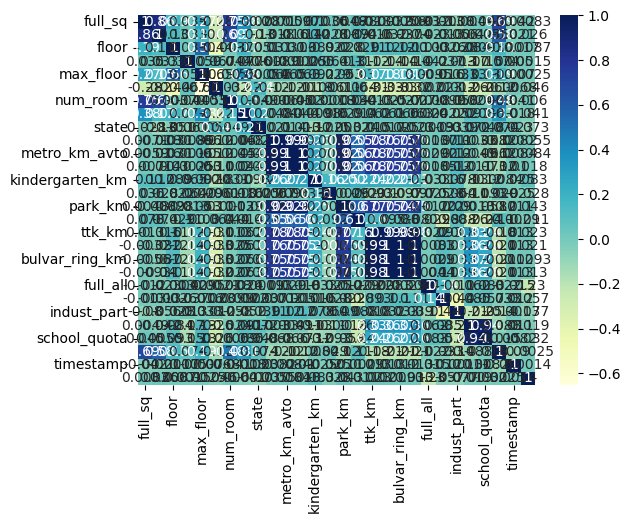

In [82]:
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True) 

In [83]:
pd.set_option('display.max_columns', 30)

In [84]:
train_df.corr()

full_sq   life_sq     floor  material  max_floor  \
full_sq          1.000000  0.864517  0.189318  0.035117   0.274122   
life_sq          0.864517  1.000000  0.128771  0.033228   0.146827   
floor            0.189318  0.128771  1.000000  0.033280   0.556100   
material         0.035117  0.033228  0.033280  1.000000   0.059418   
max_floor        0.274122  0.146827  0.556100  0.059418   1.000000   
build_year      -0.278751 -0.203463 -0.443583  0.066996  -0.652505   
num_room         0.750839  0.693216  0.003720 -0.044157  -0.005550   
kitch_sq         0.377070  0.168017  0.173599  0.076831   0.384772   
state           -0.028483 -0.126236 -0.051380 -0.060944  -0.000541   
metro_min_avto   0.007149 -0.017748  0.030750 -0.008901   0.065542   
metro_km_avto    0.005909 -0.016161  0.030862 -0.001139   0.064770   
metro_min_walk   0.007016 -0.014376  0.029687 -0.002480   0.062739   
kindergarten_km  0.100200  0.116623  0.088577  0.065271   0.091581   
school_km        0.035749  0.027671 -0.022125  0.063827  -0.029464   
park_km          0.004796 -0.008896  0.027717 -0.013142   0.053463   
mkad_km          0.077720  0.073724 -0.029004  0.110607  -0.029869   
ttk_km           0.013391 -0.016097  0.114478 -0.123056   0.173209   
sadovoe_km      -0.003163 -0.032301  0.117351 -0.135724   0.178452   
bulvar_ring_km  -0.005595 -0.036614  0.117870 -0.138435   0.179853   
kremlin_km      -0.009325 -0.039980  0.112558 -0.135454   0.171547   
full_all        -0.011848 -0.023296 -0.013001  0.041964   0.009486   
green_zone_part -0.012583 -0.013441  0.002560 -0.036681  -0.016115   
indust_part     -0.079593 -0.056332 -0.028013  0.013148  -0.033329   
preschool_quota  0.004858 -0.042248  0.083587 -0.173363   0.126666   
school_quota     0.044580  0.005524  0.092995 -0.150087   0.129807   
price_doc        0.691355  0.576936  0.146818  0.074002   0.187443   
timestamp       -0.042481 -0.020679 -0.001655  0.004974  -0.007001   
sub_area         0.008270  0.025625  0.008698  0.001462   0.002527   

                 build_year  num_room  kitch_sq     state  metro_min_avto  \
full_sq           -0.278751  0.750839  0.377070 -0.028483        0.007149   
life_sq           -0.203463  0.693216  0.168017 -0.126236       -0.017748   
floor             -0.443583  0.003720  0.173599 -0.051380        0.030750   
material           0.066996 -0.044157  0.076831 -0.060944       -0.008901   
max_floor         -0.652505 -0.005550  0.384772 -0.000541        0.065542   
build_year         1.000000  0.031552 -0.218930  0.138939       -0.116226   
num_room           0.031552  1.000000  0.150424  0.049339       -0.000602   
kitch_sq          -0.218930  0.150424  1.000000  0.196511        0.048246   
state              0.138939  0.049339  0.196511  1.000000        0.021254   
metro_min_avto    -0.116226 -0.000602  0.048246  0.021254        1.000000   
metro_km_avto     -0.116404 -0.004525  0.044392  0.014202        0.991986   
metro_min_walk    -0.113000 -0.001984  0.043601  0.013389        0.992027   
kindergarten_km   -0.178505  0.030993 -0.009848 -0.119484        0.259406   
school_km          0.006054 -0.001847  0.015718 -0.025052        0.006672   
park_km           -0.113884  0.001296  0.028961 -0.003169        0.917306   
mkad_km            0.064431  0.043895  0.014055 -0.023621        0.552688   
ttk_km            -0.313149 -0.012724  0.061710  0.015438        0.784782   
sadovoe_km        -0.329221 -0.025387  0.061109  0.016682        0.758159   
bulvar_ring_km    -0.326671 -0.026663  0.065725  0.024569        0.749082   
kremlin_km        -0.319065 -0.027465  0.063095  0.022566        0.753328   
full_all           0.002107 -0.018244  0.024245 -0.001948        0.013380   
green_zone_part    0.022828  0.009894  0.002216  0.032722        0.007148   
indust_part        0.012089 -0.058327 -0.052059 -0.039107        0.113768   
preschool_quota   -0.260528 -0.023724  0.091357  0.071744       -0.003284   
school_quota      -0.260072  0.000685  0.086052  0.048169     

Вывод:

Столбцы с высокой корреляцией: 

(metro_min_avto,	metro_km_avto,	metro_min_walk,  park_km,  mkad_km,	ttk_km,	sadovoe_km,	bulvar_ring_km,	kremlin_km): оставляем kremlin_km

(kindergarten_km,	school_km): оставляем school_km

(preschool_quota, 	school_quota): оставляем school_quota


In [85]:
non_corr_columns = [

    "full_sq",
    "life_sq",
    "floor",
    "material",
    "max_floor",
    "build_year",
    "num_room",
    "kitch_sq",
    "state",

    "sub_area",
    "school_km",
    "kremlin_km",

    "full_all",
    "green_zone_part",
    "indust_part",
    "school_quota",
    "hospital_beds_raion",

    "timestamp",
    "price_doc"
]
train_df = train_df.filter(items=non_corr_columns)
train_df

full_sq  life_sq  floor  material  max_floor  build_year  num_room  \
8135        53     30.0   10.0       1.0       16.0        44.0       2.0   
8154        45     27.0    6.0       1.0        9.0        54.0       2.0   
8255        74     46.0   12.0       1.0       24.0        20.0       3.0   
8282        51     30.0    7.0       1.0       17.0        21.0       2.0   
8287        77     50.0    3.0       2.0        5.0        67.0       3.0   
...        ...      ...    ...       ...        ...         ...       ...   
30463       56     29.0   13.0       1.0       14.0        23.0       2.0   
30466       44     27.0    7.0       1.0        9.0        49.0       2.0   
30467       86     59.0    3.0       2.0        9.0        89.0       4.0   
30469       64     32.0    5.0       1.0       15.0        21.0       2.0   
30470       43     28.0    1.0       1.0        9.0        56.0       2.0   

       kitch_sq  state  sub_area  school_km  kremlin_km  full_all  \
8135        8.0    3.0        55   0.364994   15.345902     68630   
8154        6.0    3.0        94   0.183503   20.728839     78616   
8255        9.0    3.0        39   0.140458   13.529297     27992   
8282        9.0    3.0       103   0.827697   17.455159    125111   
8287        8.0    2.0         0   0.508435    5.200064   1100773   
...         ...    ...       ...        ...         ...       ...   
30463      11.0    3.0        97   0.193474   16.626186     53786   
30466       6.0    3.0        81   0.349899   12.599292     61396   
30467      10.0    3.0       112   0.362681    3.269284    116742   
30469      11.0    2.0        76   0.130667   13.622569     83844   
30470       6.0    2.0        74   0.378950   11.812614     72131   

       green_zone_part  indust_part  school_quota  timestamp  price_doc  
8135          0.258663     0.101872        7236.0       3963    9000000  
8154          0.579645     0.000000        7653.0       3961    7100000  
8255          0.157332     0.232205        6476.0       3958   12100000  
8282          0.083810     0.371149        9700.0       3956    7700000  
8287          0.109947     0.050272        4975.0       3954   11700000  
...                ...          ...           ...        ...        ...  
30463         0.374068     0.000000        9891.0       3197   12000000  
30466         0.096270     0.300323       12721.0       3197    7400000  
30467         0.065444     0.000078        6772.0       3197   25000000  
30469         0.167526     0.093443        6083.0       3197   13500000  
30470         0.063755     0.038693        5824.0       3197    5600000  

[12662 rows x 18 columns]

<Axes: >

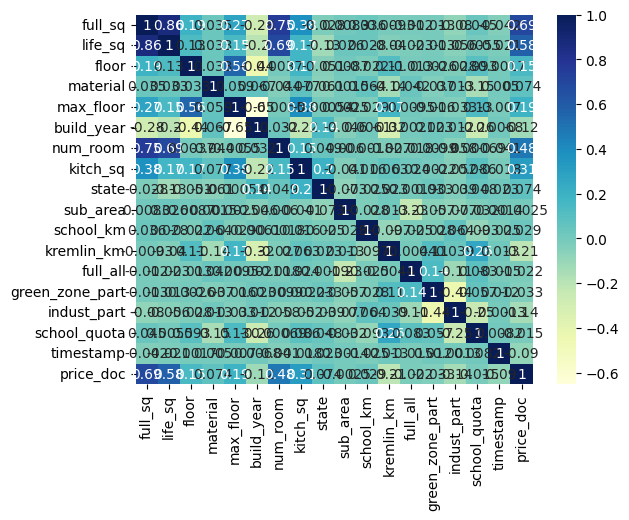

In [86]:
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True) 

In [87]:
train_df.sub_area.value_counts()

sub_area
60     346
71     319
38     295
65     260
48     210
      ... 
47      20
114     18
93      15
4        6
116      5
Name: count, Length: 124, dtype: int64

In [88]:
train_df.school_quota.value_counts()

school_quota
21892.0    346
7377.0     319
24750.0    295
17063.0    260
10529.0    210
          ... 
4091.0      20
2231.0      18
3298.0      15
5155.0       6
1924.0       5
Name: count, Length: 124, dtype: int64

In [89]:
train_df.full_all.value_counts()

full_all
165727     346
247469     319
102618     295
21155      260
221709     210
          ... 
55590       20
1285626     18
122873      15
741887       6
76308        5
Name: count, Length: 124, dtype: int64

In [90]:
train_df.green_zone_part.value_counts()

green_zone_part
0.188713    346
0.055644    319
0.137846    295
0.194703    260
0.062172    210
           ... 
0.011048     20
0.051549     18
0.146447     15
0.009851      6
0.081410      5
Name: count, Length: 124, dtype: int64

In [91]:
train_df.indust_part.value_counts()

indust_part
0.000000    1065
0.090799     346
0.243205     319
0.041116     295
0.069753     260
            ... 
0.407276      23
0.246624      20
0.036270      18
0.197368      15
0.394094       5
Name: count, Length: 111, dtype: int64

In [92]:
train_df.school_km.value_counts()

school_km
0.214197    176
0.269716    100
0.249131     51
0.480735     35
0.000000     30
           ... 
0.276716      1
0.736226      1
0.829722      1
0.268290      1
0.130667      1
Name: count, Length: 8058, dtype: int64

In [93]:
train_df.kremlin_km.value_counts()

kremlin_km
20.549464    176
0.072897     100
18.752843     51
19.691904     35
15.869044     28
            ... 
15.323615      1
14.099051      1
6.281530       1
15.170973      1
13.622569      1
Name: count, Length: 8079, dtype: int64

столбцы **school_quota**, **full_all**, **green_zone_part**, **indust_part**, принимает значения в сависимости от значения столбца **sub_area**, поэтомму его тоже можно удалить

столбец **school_km** принимает значение в зависимости от значения столбца **kremlin_km**, поэтому его можно удалить

In [94]:
train_df = train_df.drop(columns=['school_quota', 'full_all', 'green_zone_part', 'indust_part', 'school_km'])
train_df

full_sq  life_sq  floor  material  max_floor  build_year  num_room  \
8135        53     30.0   10.0       1.0       16.0        44.0       2.0   
8154        45     27.0    6.0       1.0        9.0        54.0       2.0   
8255        74     46.0   12.0       1.0       24.0        20.0       3.0   
8282        51     30.0    7.0       1.0       17.0        21.0       2.0   
8287        77     50.0    3.0       2.0        5.0        67.0       3.0   
...        ...      ...    ...       ...        ...         ...       ...   
30463       56     29.0   13.0       1.0       14.0        23.0       2.0   
30466       44     27.0    7.0       1.0        9.0        49.0       2.0   
30467       86     59.0    3.0       2.0        9.0        89.0       4.0   
30469       64     32.0    5.0       1.0       15.0        21.0       2.0   
30470       43     28.0    1.0       1.0        9.0        56.0       2.0   

       kitch_sq  state  sub_area  kremlin_km  timestamp  price_doc  
8135        8.0    3.0        55   15.345902       3963    9000000  
8154        6.0    3.0        94   20.728839       3961    7100000  
8255        9.0    3.0        39   13.529297       3958   12100000  
8282        9.0    3.0       103   17.455159       3956    7700000  
8287        8.0    2.0         0    5.200064       3954   11700000  
...         ...    ...       ...         ...        ...        ...  
30463      11.0    3.0        97   16.626186       3197   12000000  
30466       6.0    3.0        81   12.599292       3197    7400000  
30467      10.0    3.0       112    3.269284       3197   25000000  
30469      11.0    2.0        76   13.622569       3197   13500000  
30470       6.0    2.0        74   11.812614       3197    5600000  

[12662 rows x 13 columns]

<Axes: >

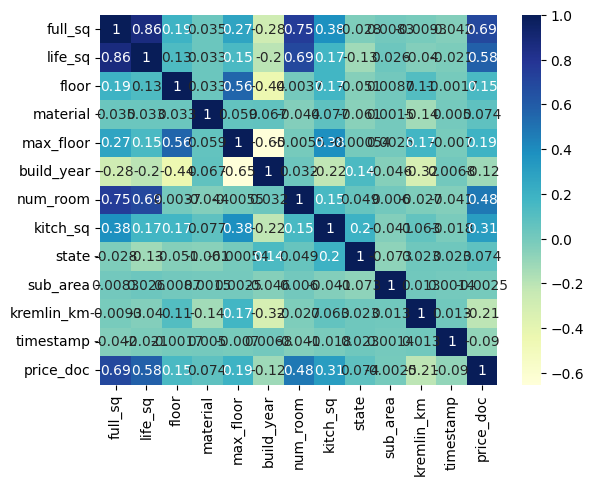

In [95]:
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True) 

In [96]:
train_df.corr()

full_sq   life_sq     floor  material  max_floor  build_year  \
full_sq     1.000000  0.864517  0.189318  0.035117   0.274122   -0.278751   
life_sq     0.864517  1.000000  0.128771  0.033228   0.146827   -0.203463   
floor       0.189318  0.128771  1.000000  0.033280   0.556100   -0.443583   
material    0.035117  0.033228  0.033280  1.000000   0.059418    0.066996   
max_floor   0.274122  0.146827  0.556100  0.059418   1.000000   -0.652505   
build_year -0.278751 -0.203463 -0.443583  0.066996  -0.652505    1.000000   
num_room    0.750839  0.693216  0.003720 -0.044157  -0.005550    0.031552   
kitch_sq    0.377070  0.168017  0.173599  0.076831   0.384772   -0.218930   
state      -0.028483 -0.126236 -0.051380 -0.060944  -0.000541    0.138939   
sub_area    0.008270  0.025625  0.008698  0.001462   0.002527   -0.046289   
kremlin_km -0.009325 -0.039980  0.112558 -0.135454   0.171547   -0.319065   
timestamp  -0.042481 -0.020679 -0.001655  0.004974  -0.007001    0.006754   
price_doc   0.691355  0.576936  0.146818  0.074002   0.187443   -0.118232   

            num_room  kitch_sq     state  sub_area  kremlin_km  timestamp  \
full_sq     0.750839  0.377070 -0.028483  0.008270   -0.009325  -0.042481   
life_sq     0.693216  0.168017 -0.126236  0.025625   -0.039980  -0.020679   
floor       0.003720  0.173599 -0.051380  0.008698    0.112558  -0.001655   
material   -0.044157  0.076831 -0.060944  0.001462   -0.135454   0.004974   
max_floor  -0.005550  0.384772 -0.000541  0.002527    0.171547  -0.007001   
build_year  0.031552 -0.218930  0.138939 -0.046289   -0.319065   0.006754   
num_room    1.000000  0.150424  0.049339  0.005968   -0.027465  -0.040553   
kitch_sq    0.150424  1.000000  0.196511 -0.040975    0.063095  -0.018144   
state       0.049339  0.196511  1.000000 -0.072874    0.022566   0.023145   
sub_area    0.005968 -0.040975 -0.072874  1.000000    0.013025   0.001438   
kremlin_km -0.027465  0.063095  0.022566  0.013025    1.000000   0.012964   
timestamp  -0.040553 -0.018144  0.023145  0.001438    0.012964   1.000000   
price_doc   0.479110  0.312810  0.074048 -0.002547   -0.211147  -0.089644   

            price_doc  
full_sq      0.691355  
life_sq      0.576936  
floor        0.146818  
material     0.074002  
max_floor    0.187443  
build_year  -0.118232  
num_room     0.479110  
kitch_sq     0.312810  
state        0.074048  
sub_area    -0.002547  
kremlin_km  -0.211147  
timestamp   -0.089644  
price_doc    1.000000

Стобцы **full_sq** и **life_sq** сильно коррелированы, поэтому столбец **life_sq** можно удалить

In [97]:
train_df = train_df.drop(columns='life_sq')
train_df

full_sq  floor  material  max_floor  build_year  num_room  kitch_sq  \
8135        53   10.0       1.0       16.0        44.0       2.0       8.0   
8154        45    6.0       1.0        9.0        54.0       2.0       6.0   
8255        74   12.0       1.0       24.0        20.0       3.0       9.0   
8282        51    7.0       1.0       17.0        21.0       2.0       9.0   
8287        77    3.0       2.0        5.0        67.0       3.0       8.0   
...        ...    ...       ...        ...         ...       ...       ...   
30463       56   13.0       1.0       14.0        23.0       2.0      11.0   
30466       44    7.0       1.0        9.0        49.0       2.0       6.0   
30467       86    3.0       2.0        9.0        89.0       4.0      10.0   
30469       64    5.0       1.0       15.0        21.0       2.0      11.0   
30470       43    1.0       1.0        9.0        56.0       2.0       6.0   

       state  sub_area  kremlin_km  timestamp  price_doc  
8135     3.0        55   15.345902       3963    9000000  
8154     3.0        94   20.728839       3961    7100000  
8255     3.0        39   13.529297       3958   12100000  
8282     3.0       103   17.455159       3956    7700000  
8287     2.0         0    5.200064       3954   11700000  
...      ...       ...         ...        ...        ...  
30463    3.0        97   16.626186       3197   12000000  
30466    3.0        81   12.599292       3197    7400000  
30467    3.0       112    3.269284       3197   25000000  
30469    2.0        76   13.622569       3197   13500000  
30470    2.0        74   11.812614       3197    5600000  

[12662 rows x 12 columns]

<Axes: >

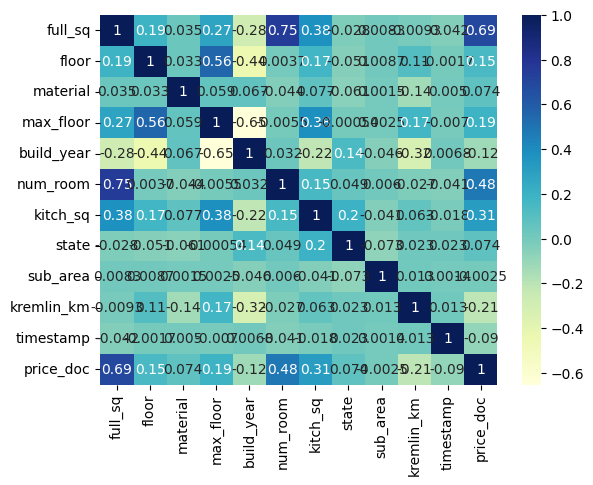

In [98]:
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True) 

In [99]:
train_df

full_sq  floor  material  max_floor  build_year  num_room  kitch_sq  \
8135        53   10.0       1.0       16.0        44.0       2.0       8.0   
8154        45    6.0       1.0        9.0        54.0       2.0       6.0   
8255        74   12.0       1.0       24.0        20.0       3.0       9.0   
8282        51    7.0       1.0       17.0        21.0       2.0       9.0   
8287        77    3.0       2.0        5.0        67.0       3.0       8.0   
...        ...    ...       ...        ...         ...       ...       ...   
30463       56   13.0       1.0       14.0        23.0       2.0      11.0   
30466       44    7.0       1.0        9.0        49.0       2.0       6.0   
30467       86    3.0       2.0        9.0        89.0       4.0      10.0   
30469       64    5.0       1.0       15.0        21.0       2.0      11.0   
30470       43    1.0       1.0        9.0        56.0       2.0       6.0   

       state  sub_area  kremlin_km  timestamp  price_doc  
8135     3.0        55   15.345902       3963    9000000  
8154     3.0        94   20.728839       3961    7100000  
8255     3.0        39   13.529297       3958   12100000  
8282     3.0       103   17.455159       3956    7700000  
8287     2.0         0    5.200064       3954   11700000  
...      ...       ...         ...        ...        ...  
30463    3.0        97   16.626186       3197   12000000  
30466    3.0        81   12.599292       3197    7400000  
30467    3.0       112    3.269284       3197   25000000  
30469    2.0        76   13.622569       3197   13500000  
30470    2.0        74   11.812614       3197    5600000  

[12662 rows x 12 columns]

# Выявление аномалий

Для начала удалим неположительные числа там, где их быть не должно

In [100]:
train_df = train_df[(train_df['full_sq'] > 0) & (train_df['floor'] > 0) & (train_df['max_floor'] > 0) & (train_df['num_room'] > 0) & (train_df['kitch_sq'] > 0) & (train_df['kremlin_km'] > 0)]
train_df

full_sq  floor  material  max_floor  build_year  num_room  kitch_sq  \
8135        53   10.0       1.0       16.0        44.0       2.0       8.0   
8154        45    6.0       1.0        9.0        54.0       2.0       6.0   
8255        74   12.0       1.0       24.0        20.0       3.0       9.0   
8282        51    7.0       1.0       17.0        21.0       2.0       9.0   
8287        77    3.0       2.0        5.0        67.0       3.0       8.0   
...        ...    ...       ...        ...         ...       ...       ...   
30463       56   13.0       1.0       14.0        23.0       2.0      11.0   
30466       44    7.0       1.0        9.0        49.0       2.0       6.0   
30467       86    3.0       2.0        9.0        89.0       4.0      10.0   
30469       64    5.0       1.0       15.0        21.0       2.0      11.0   
30470       43    1.0       1.0        9.0        56.0       2.0       6.0   

       state  sub_area  kremlin_km  timestamp  price_doc  
8135     3.0        55   15.345902       3963    9000000  
8154     3.0        94   20.728839       3961    7100000  
8255     3.0        39   13.529297       3958   12100000  
8282     3.0       103   17.455159       3956    7700000  
8287     2.0         0    5.200064       3954   11700000  
...      ...       ...         ...        ...        ...  
30463    3.0        97   16.626186       3197   12000000  
30466    3.0        81   12.599292       3197    7400000  
30467    3.0       112    3.269284       3197   25000000  
30469    2.0        76   13.622569       3197   13500000  
30470    2.0        74   11.812614       3197    5600000  

[12597 rows x 12 columns]

Удалим строки, в которых значение стобца **state** не принадлежит отрезку [1, 5]

In [101]:
train_df = train_df[(train_df['state'] >= 1) & (train_df['state'] <= 5)]
train_df

full_sq  floor  material  max_floor  build_year  num_room  kitch_sq  \
8135        53   10.0       1.0       16.0        44.0       2.0       8.0   
8154        45    6.0       1.0        9.0        54.0       2.0       6.0   
8255        74   12.0       1.0       24.0        20.0       3.0       9.0   
8282        51    7.0       1.0       17.0        21.0       2.0       9.0   
8287        77    3.0       2.0        5.0        67.0       3.0       8.0   
...        ...    ...       ...        ...         ...       ...       ...   
30463       56   13.0       1.0       14.0        23.0       2.0      11.0   
30466       44    7.0       1.0        9.0        49.0       2.0       6.0   
30467       86    3.0       2.0        9.0        89.0       4.0      10.0   
30469       64    5.0       1.0       15.0        21.0       2.0      11.0   
30470       43    1.0       1.0        9.0        56.0       2.0       6.0   

       state  sub_area  kremlin_km  timestamp  price_doc  
8135     3.0        55   15.345902       3963    9000000  
8154     3.0        94   20.728839       3961    7100000  
8255     3.0        39   13.529297       3958   12100000  
8282     3.0       103   17.455159       3956    7700000  
8287     2.0         0    5.200064       3954   11700000  
...      ...       ...         ...        ...        ...  
30463    3.0        97   16.626186       3197   12000000  
30466    3.0        81   12.599292       3197    7400000  
30467    3.0       112    3.269284       3197   25000000  
30469    2.0        76   13.622569       3197   13500000  
30470    2.0        74   11.812614       3197    5600000  

[12597 rows x 12 columns]

Построим ящики с усами для каждого столбца

<Axes: ylabel='full_sq'>

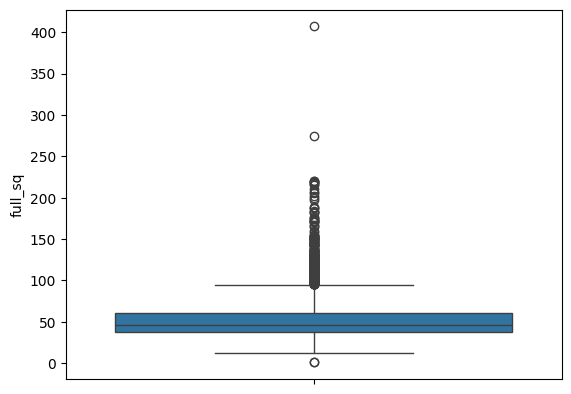

In [102]:
sns.boxplot(train_df['full_sq']) # Очень много выбросов

<Axes: ylabel='floor'>

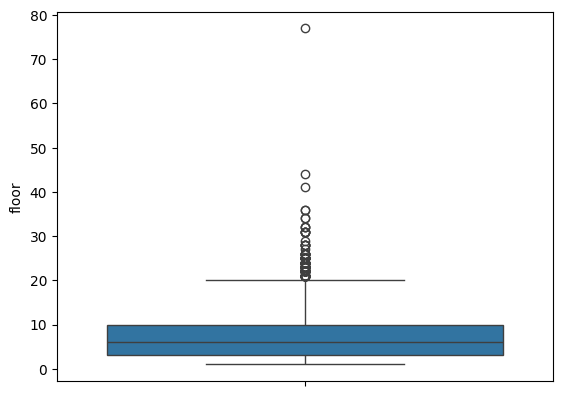

In [103]:
sns.boxplot(train_df['floor']) # нет аномалий, но много выбросов

<Axes: ylabel='material'>

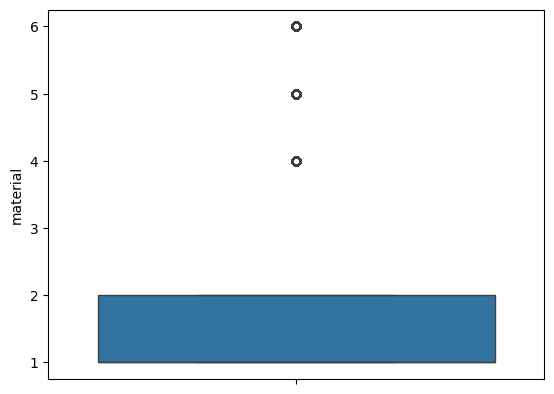

In [104]:
sns.boxplot(train_df['material'])

(array([7928.,    0., 2483.,    0.,    0.,    0.,  569.,    0., 1382.,
         235.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

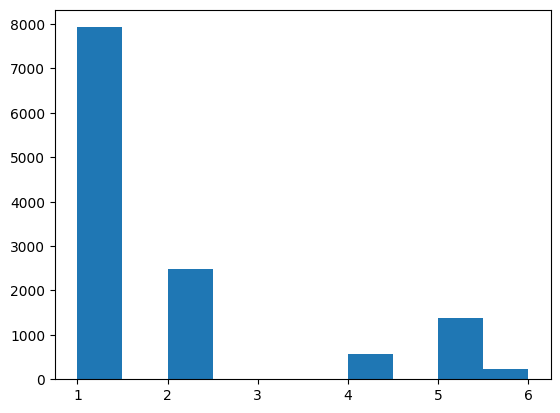

In [105]:
plt.hist(train_df['material'])

In [106]:
train_df.material.value_counts()

material
1.0    7928
2.0    2483
5.0    1382
4.0     569
6.0     235
Name: count, dtype: int64

<Axes: ylabel='max_floor'>

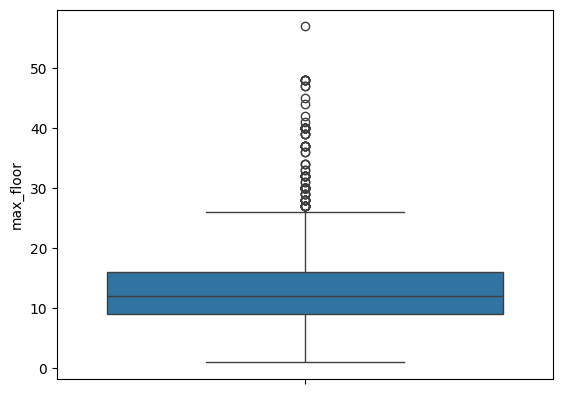

In [107]:
sns.boxplot(train_df['max_floor']) #реальные значения, но есть выбросы

<Axes: ylabel='build_year'>

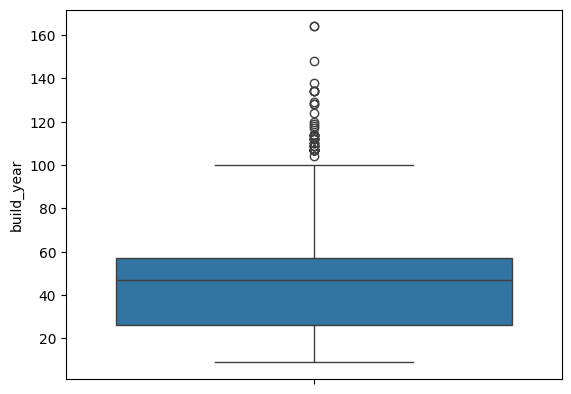

In [108]:
sns.boxplot(train_df['build_year']) # выбросы

<Axes: ylabel='num_room'>

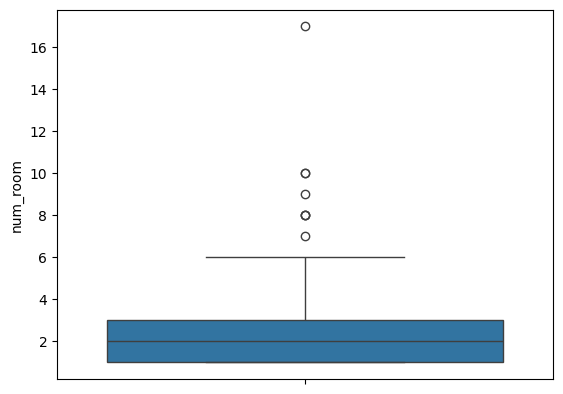

In [109]:
sns.boxplot(train_df['num_room']) #выбросы

<Axes: ylabel='kitch_sq'>

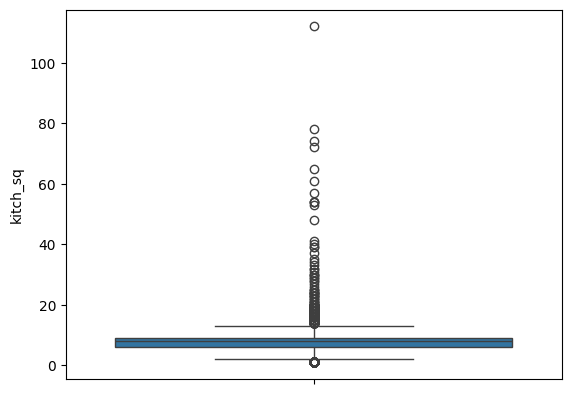

In [110]:
sns.boxplot(train_df['kitch_sq']) #много выбросов

<Axes: ylabel='state'>

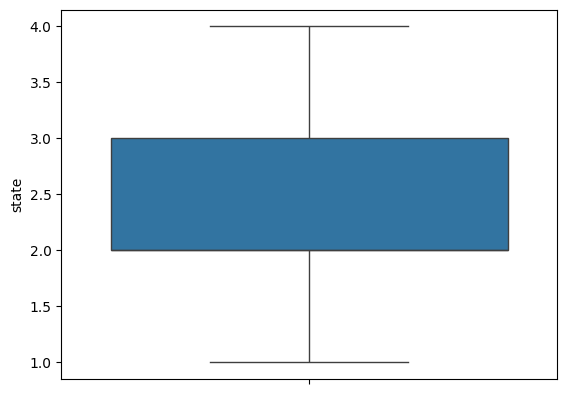

In [111]:
sns.boxplot(train_df['state'])

<Axes: ylabel='sub_area'>

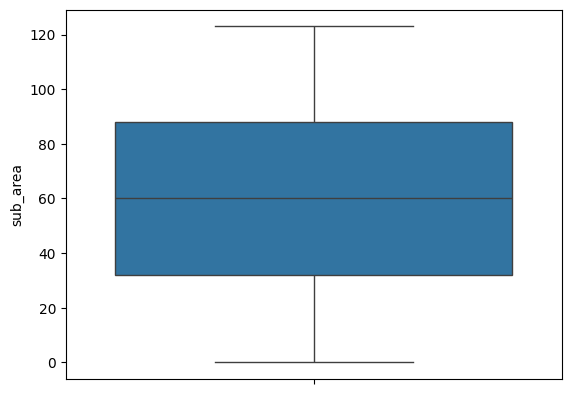

In [112]:
sns.boxplot(train_df['sub_area'])

<Axes: ylabel='kremlin_km'>

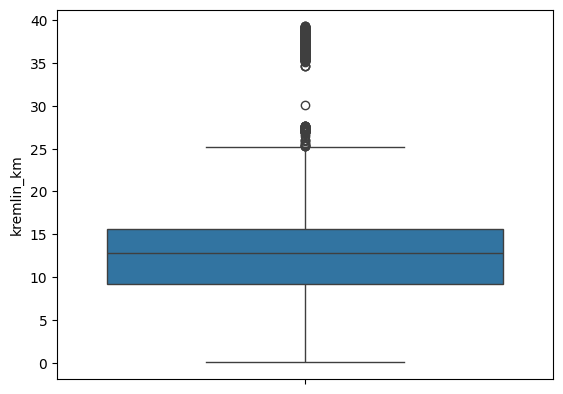

In [113]:
sns.boxplot(train_df['kremlin_km']) # много выбросов

<Axes: ylabel='timestamp'>

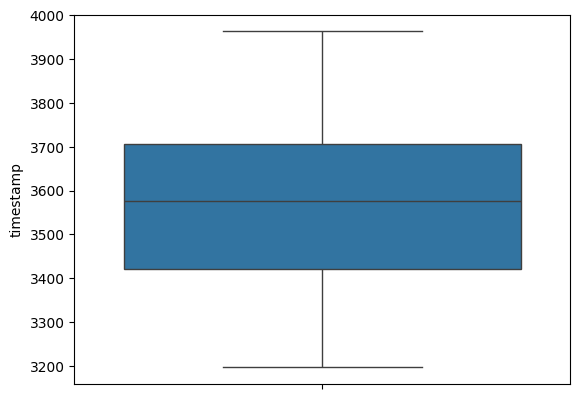

In [114]:
sns.boxplot(train_df['timestamp'])

<Axes: ylabel='price_doc'>

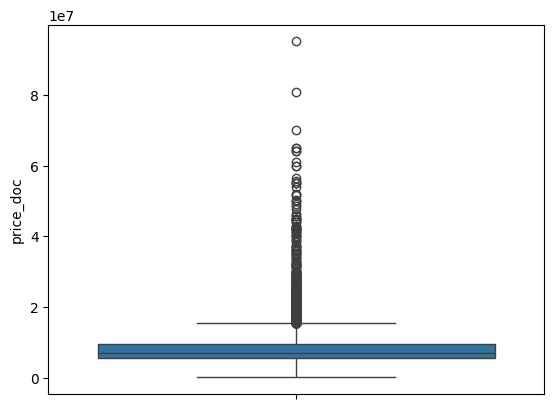

In [115]:
sns.boxplot(train_df['price_doc']) # много выбросов

Удаляем выбросы методом межквартильного дипазона

In [116]:
for col in train_df.columns:
    Q3 = np.quantile(train_df[col], 0.75)
    Q1 = np.quantile(train_df[col], 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    train_df = train_df[(train_df[col] >= lower_range) & (train_df[col] <= upper_range)]
    
train_df

full_sq  floor  material  max_floor  build_year  num_room  kitch_sq  \
8135        53   10.0       1.0       16.0        44.0       2.0       8.0   
8154        45    6.0       1.0        9.0        54.0       2.0       6.0   
8255        74   12.0       1.0       24.0        20.0       3.0       9.0   
8282        51    7.0       1.0       17.0        21.0       2.0       9.0   
8287        77    3.0       2.0        5.0        67.0       3.0       8.0   
...        ...    ...       ...        ...         ...       ...       ...   
30461       36    5.0       1.0       16.0        44.0       1.0       8.0   
30463       56   13.0       1.0       14.0        23.0       2.0      11.0   
30466       44    7.0       1.0        9.0        49.0       2.0       6.0   
30469       64    5.0       1.0       15.0        21.0       2.0      11.0   
30470       43    1.0       1.0        9.0        56.0       2.0       6.0   

       state  sub_area  kremlin_km  timestamp  price_doc  
8135     3.0        55   15.345902       3963    9000000  
8154     3.0        94   20.728839       3961    7100000  
8255     3.0        39   13.529297       3958   12100000  
8282     3.0       103   17.455159       3956    7700000  
8287     2.0         0    5.200064       3954   11700000  
...      ...       ...         ...        ...        ...  
30461    3.0        76   10.516156       3197    5000000  
30463    3.0        97   16.626186       3197   12000000  
30466    3.0        81   12.599292       3197    7400000  
30469    2.0        76   13.622569       3197   13500000  
30470    2.0        74   11.812614       3197    5600000  

[9080 rows x 12 columns]

# Проверяем сбалансированность

<Axes: ylabel='full_sq'>

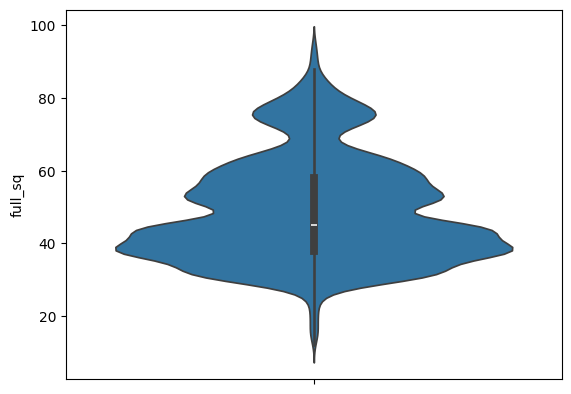

In [117]:
sns.violinplot(train_df.full_sq)

<Axes: ylabel='floor'>

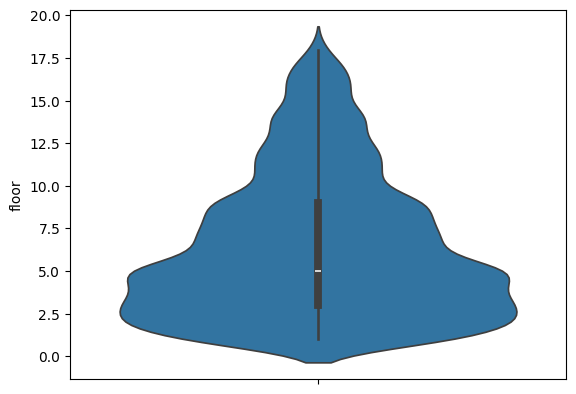

In [119]:
sns.violinplot(train_df.floor)

<Axes: ylabel='material'>

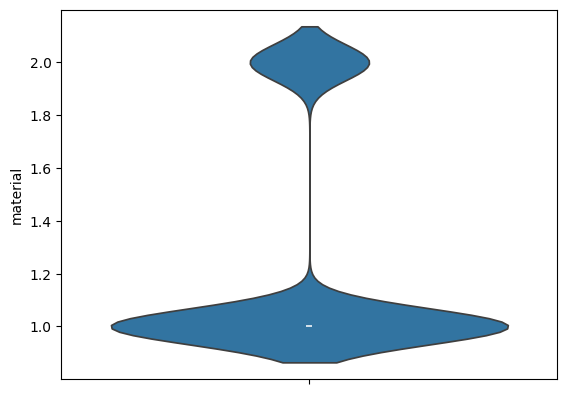

In [120]:
sns.violinplot(train_df.material)

<Axes: ylabel='max_floor'>

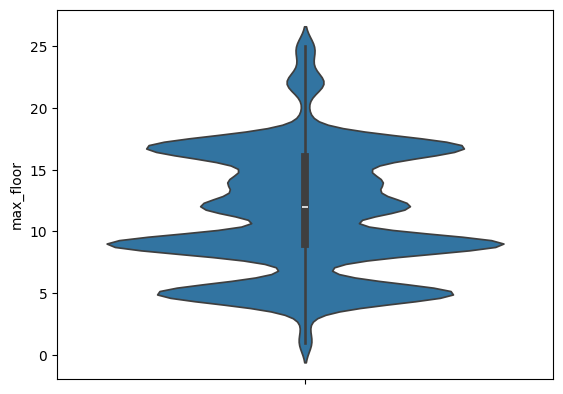

In [121]:
sns.violinplot(train_df.max_floor)

<Axes: ylabel='build_year'>

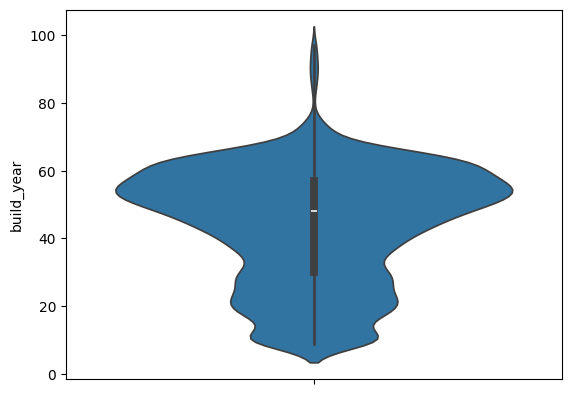

In [122]:
sns.violinplot(train_df.build_year)

<Axes: ylabel='num_room'>

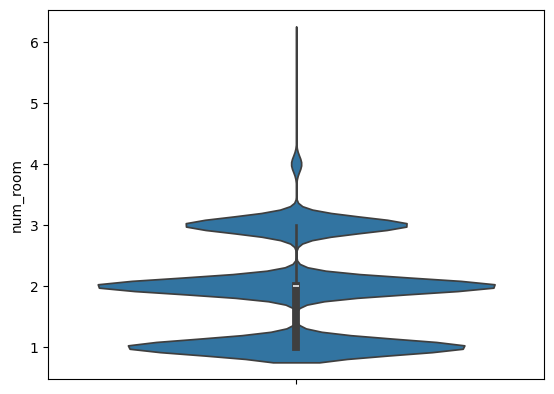

In [123]:
sns.violinplot(train_df.num_room)

<Axes: ylabel='kitch_sq'>

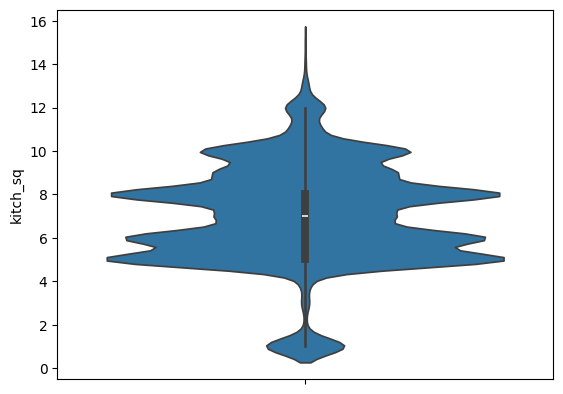

In [124]:
sns.violinplot(train_df.kitch_sq)

<Axes: ylabel='state'>

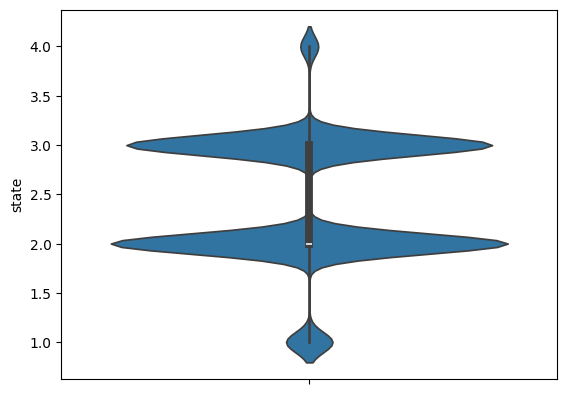

In [125]:
sns.violinplot(train_df.state)

<Axes: ylabel='sub_area'>

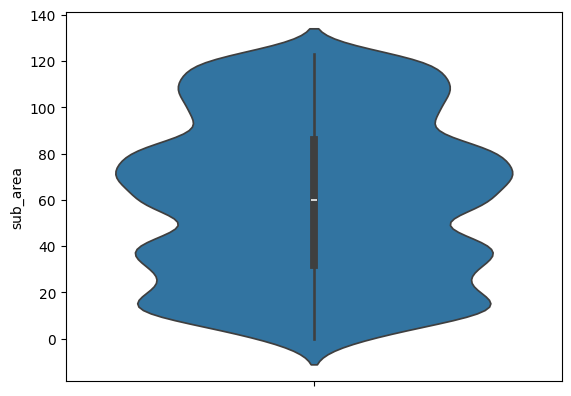

In [126]:
sns.violinplot(train_df.sub_area)

<Axes: ylabel='kremlin_km'>

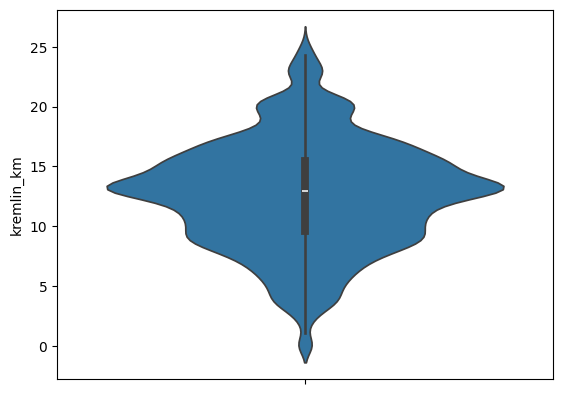

In [127]:
sns.violinplot(train_df.kremlin_km)

<Axes: ylabel='timestamp'>

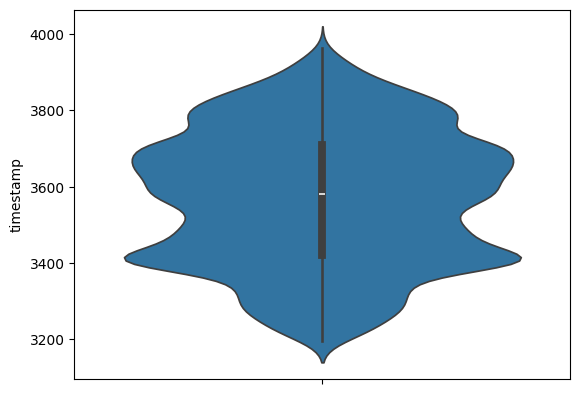

In [128]:
sns.violinplot(train_df.timestamp)

(array([ 452.,  623.,  356., 1760., 2279., 1448.,  809.,  614.,  450.,
         289.]),
 array([  500000.,  1910000.,  3320000.,  4730000.,  6140000.,  7550000.,
         8960000., 10370000., 11780000., 13190000., 14600000.]),
 <BarContainer object of 10 artists>)

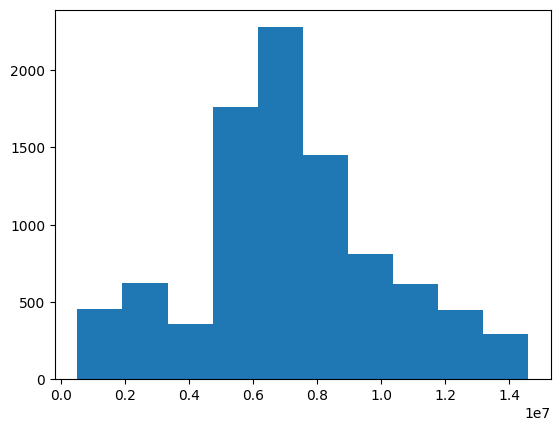

In [57]:
plt.hist(train_df['price_doc'])

<Axes: ylabel='price_doc'>

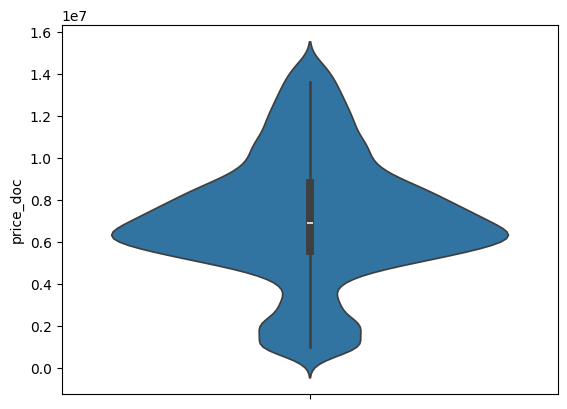

In [58]:
sns.violinplot(train_df['price_doc'])

# Отбор признаков

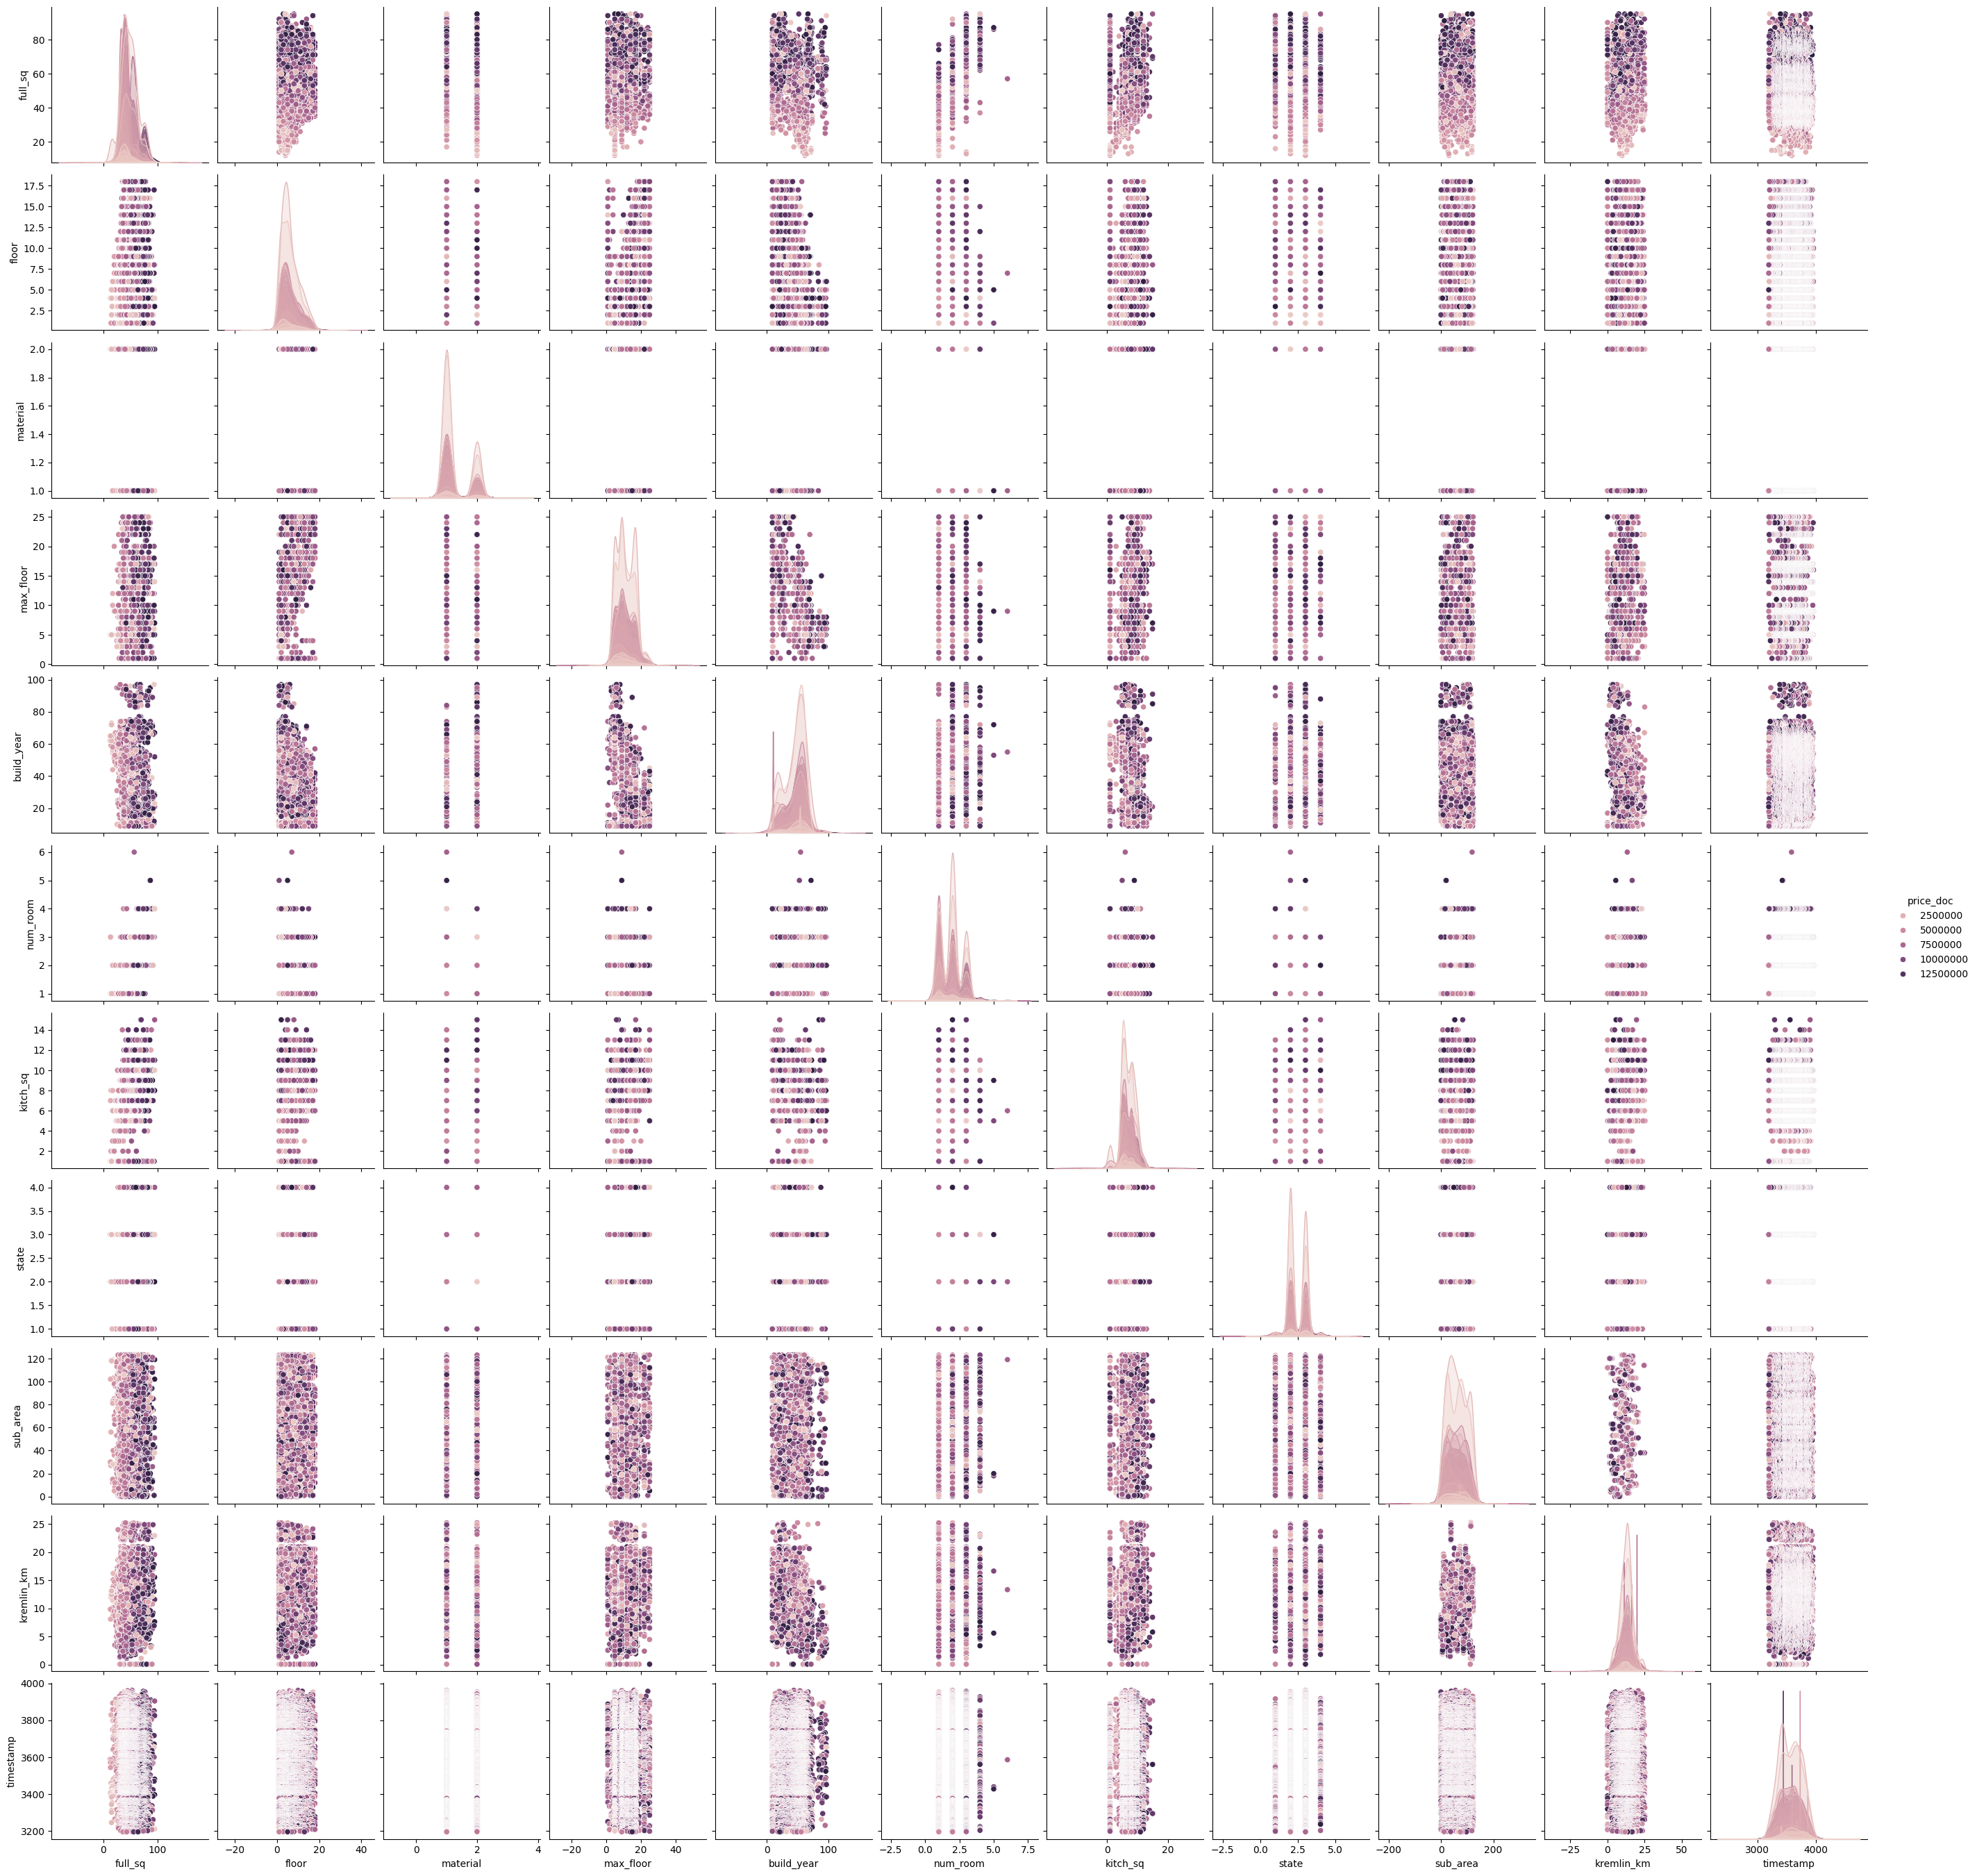

In [811]:
sns.pairplot(train_df, hue='price_doc')

Столбцы **material** и **timestamp** практически не влияют на целевую переменную

In [59]:
train_df = train_df.drop(columns=['material', 'timestamp'])
train_df

full_sq  floor  max_floor  build_year  num_room  kitch_sq  state  \
8135        53   10.0       16.0        44.0       2.0       8.0    3.0   
8154        45    6.0        9.0        54.0       2.0       6.0    3.0   
8255        74   12.0       24.0        20.0       3.0       9.0    3.0   
8282        51    7.0       17.0        21.0       2.0       9.0    3.0   
8287        77    3.0        5.0        67.0       3.0       8.0    2.0   
...        ...    ...        ...         ...       ...       ...    ...   
30461       36    5.0       16.0        44.0       1.0       8.0    3.0   
30463       56   13.0       14.0        23.0       2.0      11.0    3.0   
30466       44    7.0        9.0        49.0       2.0       6.0    3.0   
30469       64    5.0       15.0        21.0       2.0      11.0    2.0   
30470       43    1.0        9.0        56.0       2.0       6.0    2.0   

       sub_area  kremlin_km  price_doc  
8135         55   15.345902    9000000  
8154         94   20.728839    7100000  
8255         39   13.529297   12100000  
8282        103   17.455159    7700000  
8287          0    5.200064   11700000  
...         ...         ...        ...  
30461        76   10.516156    5000000  
30463        97   16.626186   12000000  
30466        81   12.599292    7400000  
30469        76   13.622569   13500000  
30470        74   11.812614    5600000  

[9080 rows x 10 columns]

In [60]:
train_df

full_sq  floor  max_floor  build_year  num_room  kitch_sq  state  \
8135        53   10.0       16.0        44.0       2.0       8.0    3.0   
8154        45    6.0        9.0        54.0       2.0       6.0    3.0   
8255        74   12.0       24.0        20.0       3.0       9.0    3.0   
8282        51    7.0       17.0        21.0       2.0       9.0    3.0   
8287        77    3.0        5.0        67.0       3.0       8.0    2.0   
...        ...    ...        ...         ...       ...       ...    ...   
30461       36    5.0       16.0        44.0       1.0       8.0    3.0   
30463       56   13.0       14.0        23.0       2.0      11.0    3.0   
30466       44    7.0        9.0        49.0       2.0       6.0    3.0   
30469       64    5.0       15.0        21.0       2.0      11.0    2.0   
30470       43    1.0        9.0        56.0       2.0       6.0    2.0   

       sub_area  kremlin_km  price_doc  
8135         55   15.345902    9000000  
8154         94   20.728839    7100000  
8255         39   13.529297   12100000  
8282        103   17.455159    7700000  
8287          0    5.200064   11700000  
...         ...         ...        ...  
30461        76   10.516156    5000000  
30463        97   16.626186   12000000  
30466        81   12.599292    7400000  
30469        76   13.622569   13500000  
30470        74   11.812614    5600000  

[9080 rows x 10 columns]

# Статистики итогового датасета

In [1084]:
train_df.describe()

full_sq        floor    max_floor   build_year     num_room  \
count  9080.000000  9080.000000  9080.000000  9080.000000  9080.000000   
mean     48.982269     6.343502    11.439758    44.225110     1.902863   
std      14.368884     4.210085     4.945000    17.136005     0.783288   
min      12.000000     1.000000     1.000000     9.000000     1.000000   
25%      38.000000     3.000000     9.000000    30.000000     1.000000   
50%      45.000000     5.000000    12.000000    48.000000     2.000000   
75%      58.000000     9.000000    16.000000    57.000000     2.000000   
max      95.000000    18.000000    25.000000    97.000000     6.000000   

          kitch_sq        state     sub_area   kremlin_km     price_doc  
count  9080.000000  9080.000000  9080.000000  9080.000000  9.080000e+03  
mean      7.014427     2.429295    60.411233    12.669635  7.125241e+06  
std       2.294755     0.632891    34.395134     4.472484  2.991534e+06  
min       1.000000     1.000000     0.000000     0.072897  5.000000e+05  
25%       5.000000     2.000000    32.000000     9.602983  5.550000e+06  
50%       7.000000     2.000000    60.000000    12.970416  6.900000e+06  
75%       8.000000     3.000000    86.000000    15.483092  8.800000e+06  
max      15.000000     4.000000   123.000000    25.254369  1.460000e+07

# Вернем строковые значения районам для удобства

In [1085]:
label = le.inverse_transform(train_df.sub_area)
train_df['sub_area'] = label
train_df

full_sq  floor  max_floor  build_year  num_room  kitch_sq  state  \
8135        53   10.0       16.0        44.0       2.0       8.0    3.0   
8154        45    6.0        9.0        54.0       2.0       6.0    3.0   
8255        74   12.0       24.0        20.0       3.0       9.0    3.0   
8282        51    7.0       17.0        21.0       2.0       9.0    3.0   
8287        77    3.0        5.0        67.0       3.0       8.0    2.0   
...        ...    ...        ...         ...       ...       ...    ...   
30461       36    5.0       16.0        44.0       1.0       8.0    3.0   
30463       56   13.0       14.0        23.0       2.0      11.0    3.0   
30466       44    7.0        9.0        49.0       2.0       6.0    3.0   
30469       64    5.0       15.0        21.0       2.0      11.0    2.0   
30470       43    1.0        9.0        56.0       2.0       6.0    2.0   

                 sub_area  kremlin_km  price_doc  
8135            Lianozovo   15.345902    9000000  
8154      Severnoe Butovo   20.728839    7100000  
8255   Juzhnoe Medvedkovo   13.529297   12100000  
8282             Solncevo   17.455159    7700000  
8287            Ajeroport    5.200064   11700000  
...                   ...         ...        ...  
30461        Obruchevskoe   10.516156    5000000  
30463    Severnoe Tushino   16.626186   12000000  
30466            Otradnoe   12.599292    7400000  
30469        Obruchevskoe   13.622569   13500000  
30470         Novogireevo   11.812614    5600000  

[9080 rows x 10 columns]

# Сравним полученные данные с реальными современными значениями

In [1087]:
train_df.sample()

full_sq  floor  max_floor  build_year  num_room  kitch_sq  state  \
24348       54    1.0        5.0        66.0       2.0       7.0    3.0   

      sub_area  kremlin_km  price_doc  
24348   Perovo    9.549202    6750000

Получили значение: 

Площадь - 54

Этаж - 1

Максимум этажей - 5

Дом построен 66 лет назад

Две комнаты

Площадь кухни - 7

Состояние - 3

Район - Перово

Цена - 6750000


Найден похожий вариант в сервисе подбора недвижимости Циан: https://www.cian.ru/sale/flat/297573553/ Цена 16200000

In [1090]:
train_df.sample()

full_sq  floor  max_floor  build_year  num_room  kitch_sq  state  \
8825       59    5.0        9.0        55.0       3.0       6.0    3.0   

      sub_area  kremlin_km  price_doc  
8825  Kon'kovo   12.554028   10000000

Получили значение: 

Площадь - 59

Этаж - 5

Максимум этажей - 9

Дом построен 55 лет назад

Три комнаты

Площадь кухни - 6

Состояние - 3

Район - Коньково

Цена - 10000000


Найден похожий вариант в сервисе подбора недвижимости Циан: https://www.cian.ru/sale/flat/299026764/ Цена 16500000

# Вывод

В ходе анализа данных мы получили набор, в котором нет пропусков, аномалий, выбросов и лишних столбцов. Но данные устарели и не могут быть использованы для построения регрессионной модели для предсказания современных цен на недвижимость